## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# To tune model, get different metric scores and split data
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score
from sklearn import metrics

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#For making pipelines
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To suppress the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
org_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Train.csv.csv')
org_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0


In [5]:
#copy of orginal data
df  = org_data.copy()
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0


## Data Overview

- Observations
- Sanity checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [7]:
df.shape

(20000, 41)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [9]:
df.Target.value_counts()

0    18890
1     1110
Name: Target, dtype: int64

In [10]:
df.Target.value_counts().values[0]/df.Target.value_counts().values.sum()

0.9445

In [11]:
df.Target.value_counts().values[1]/df.Target.value_counts().values.sum()

0.0555

Data is highly un-balanced. Most of the data is in 0th category and 5.55% data is in 1st category.

In [12]:
df.isnull().sum()[df.isnull().sum() > 0]

V1    18
V2    18
dtype: int64

## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

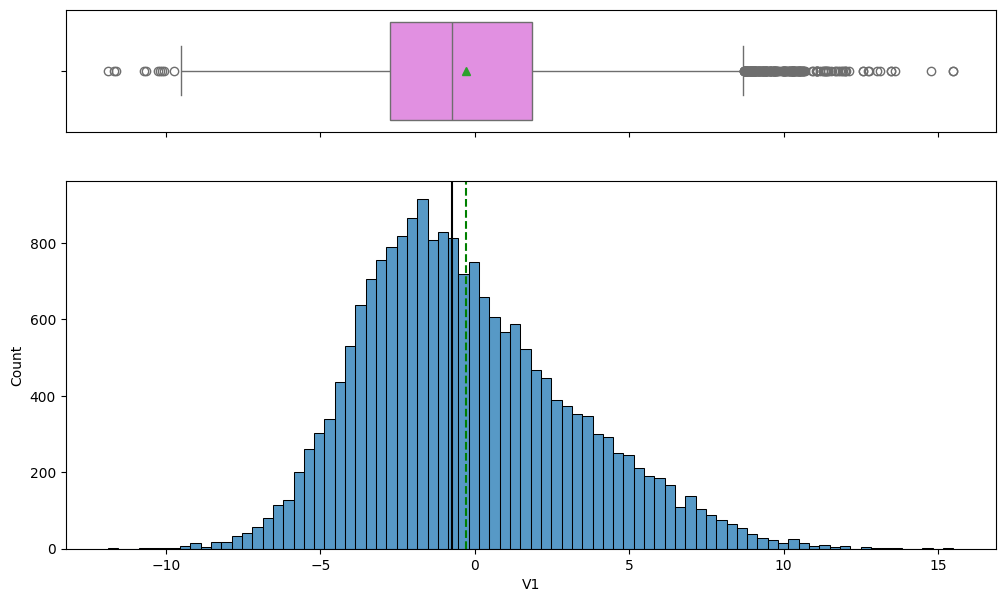

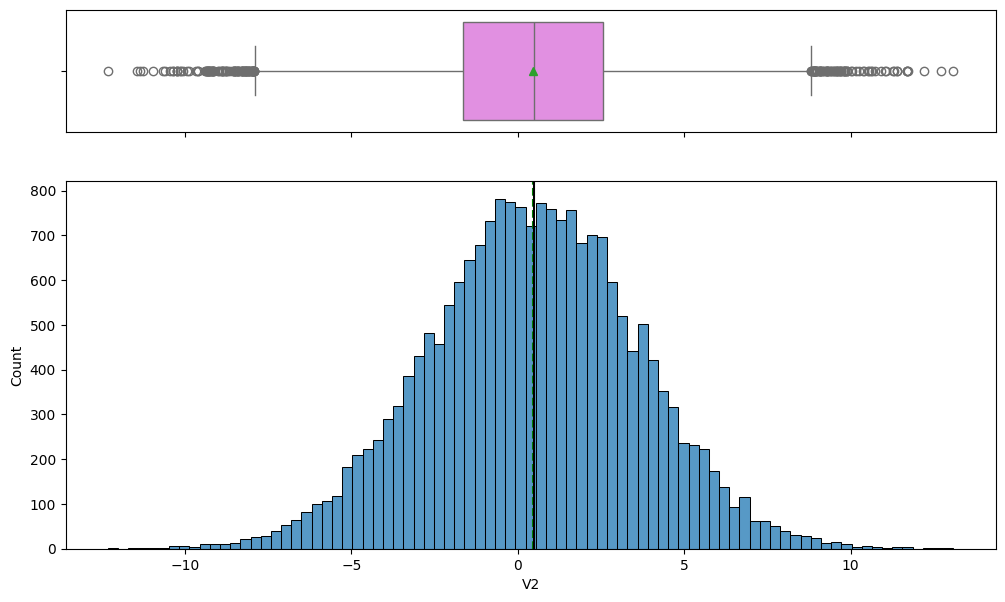

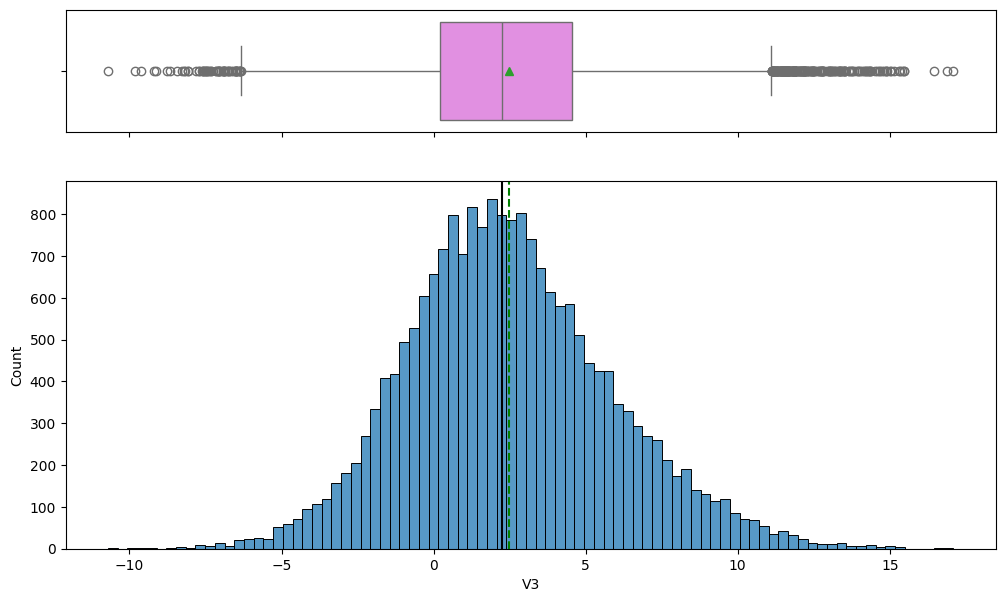

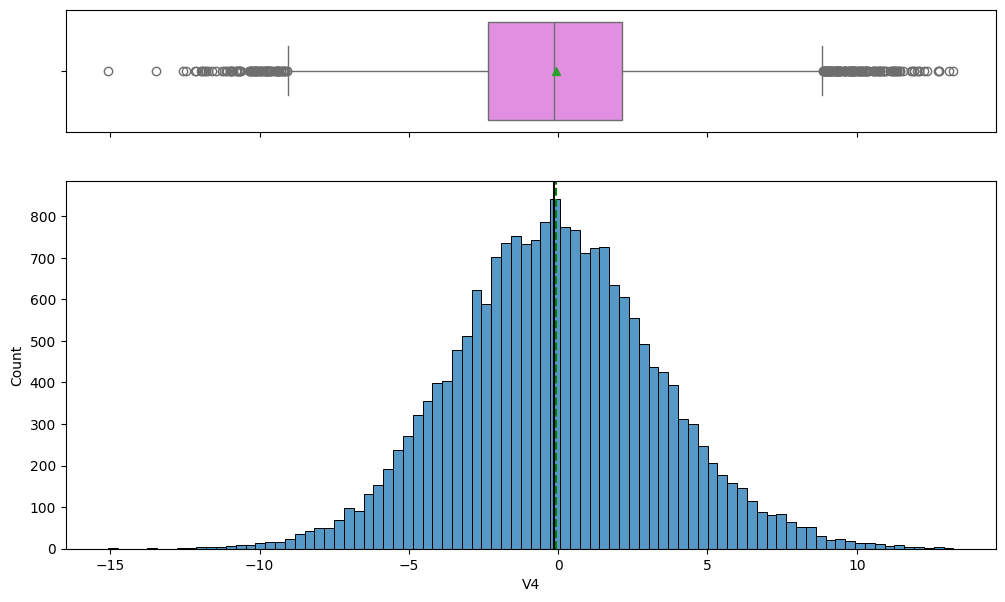

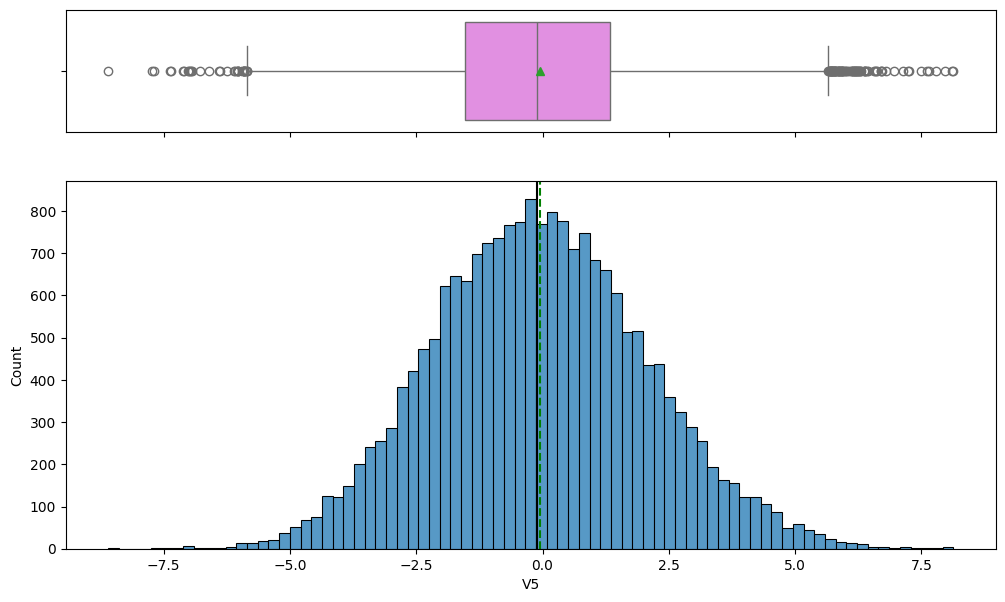

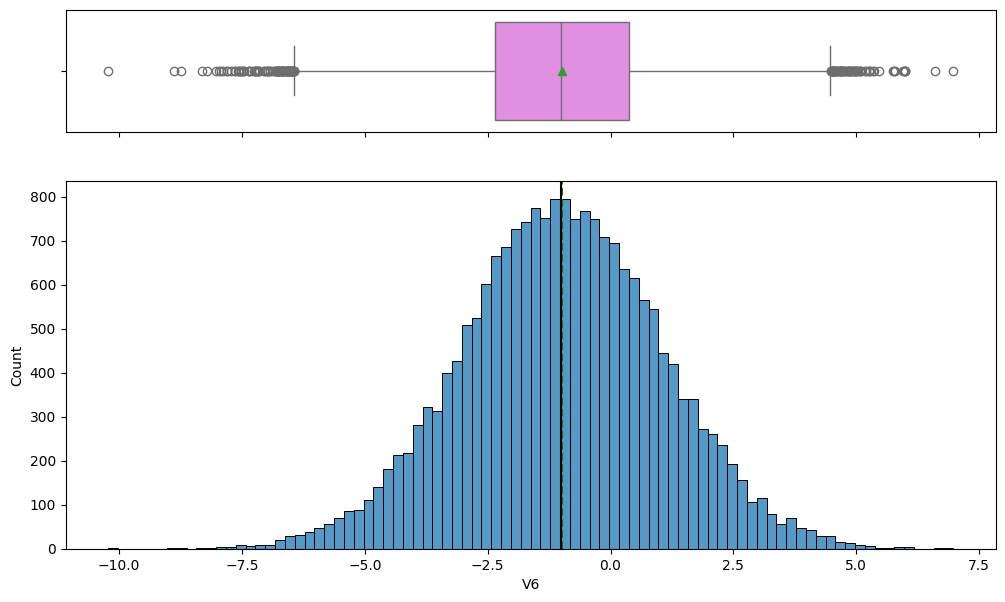

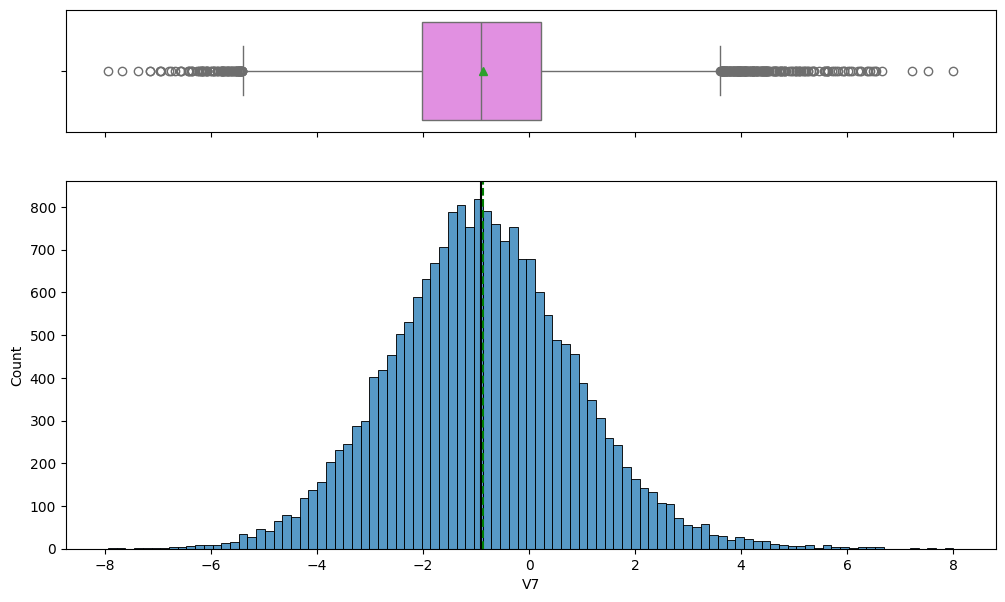

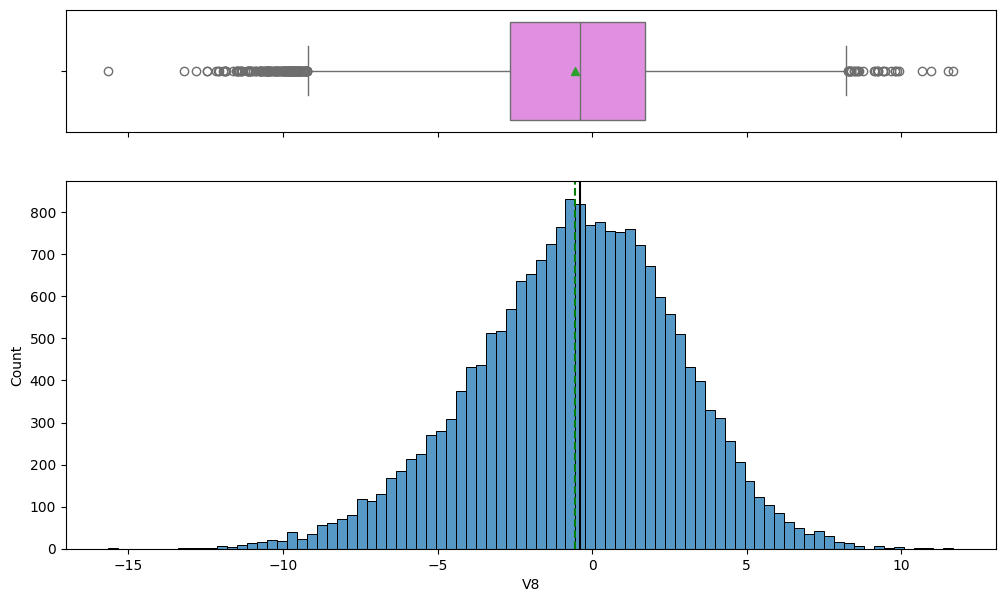

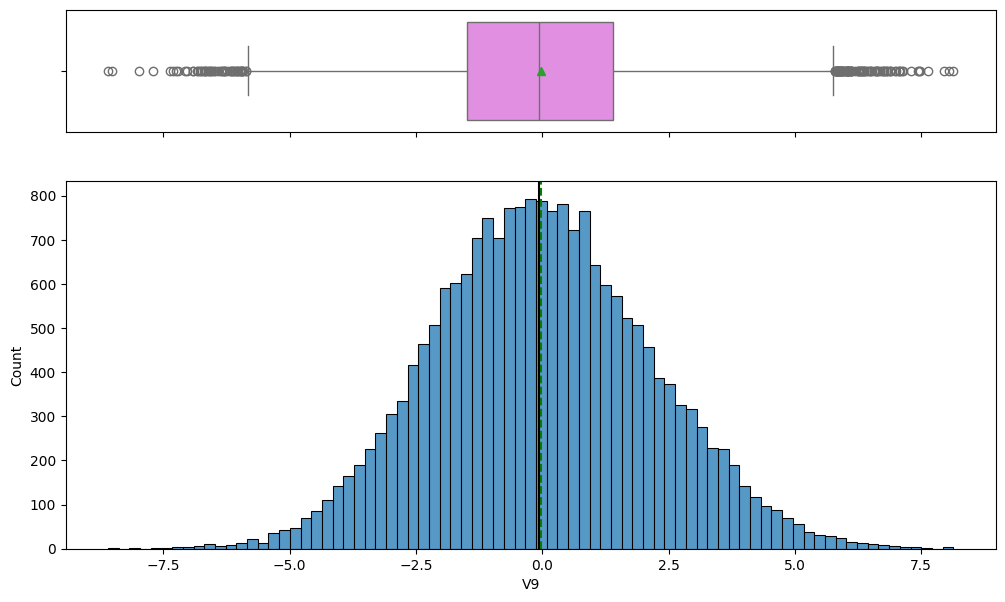

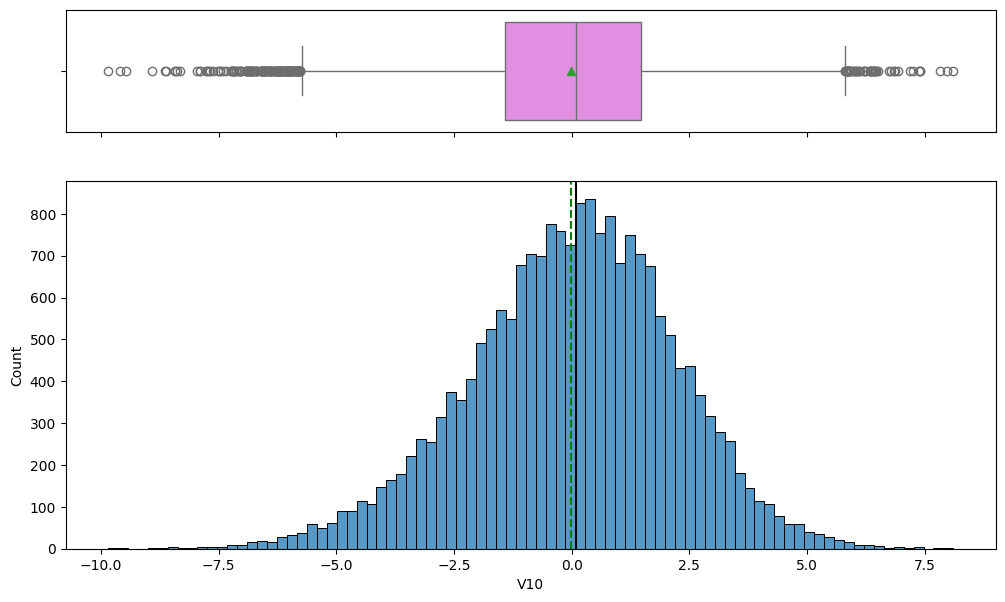

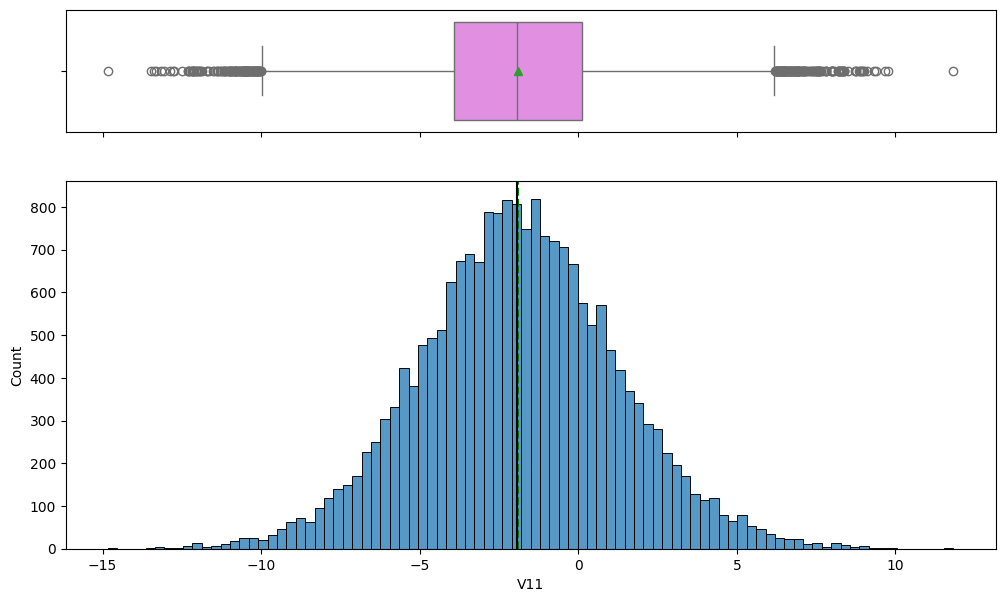

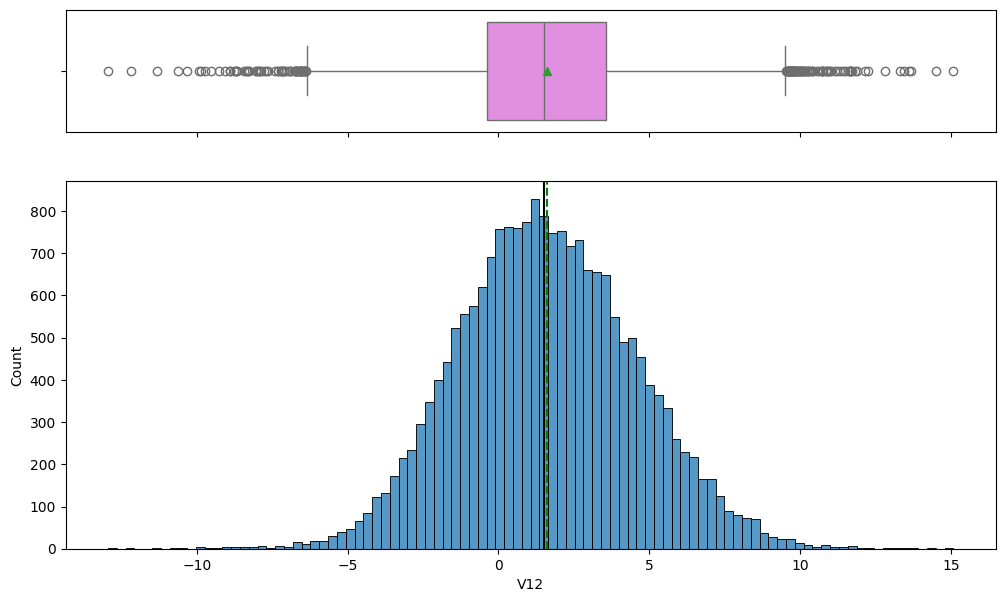

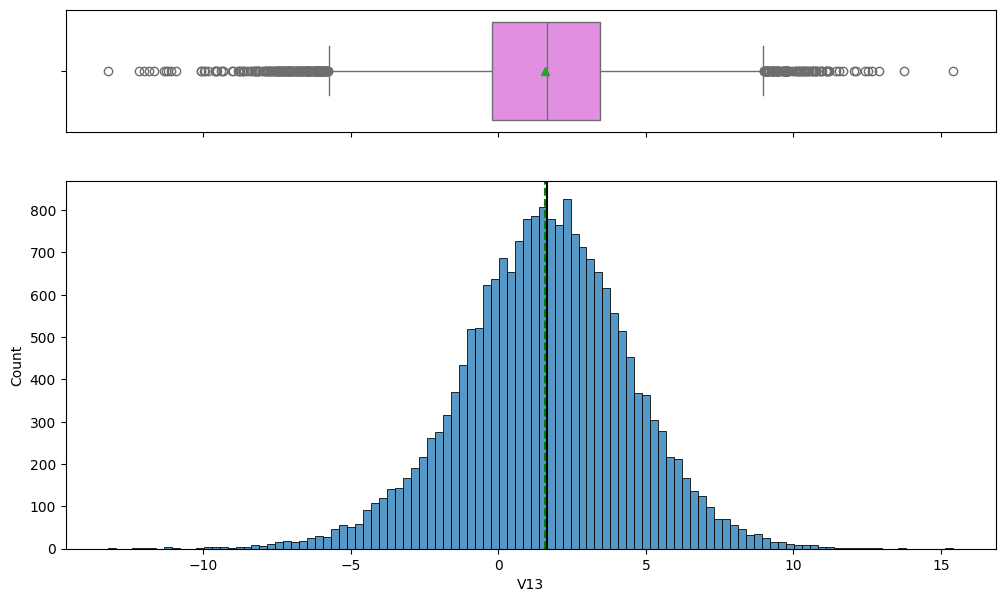

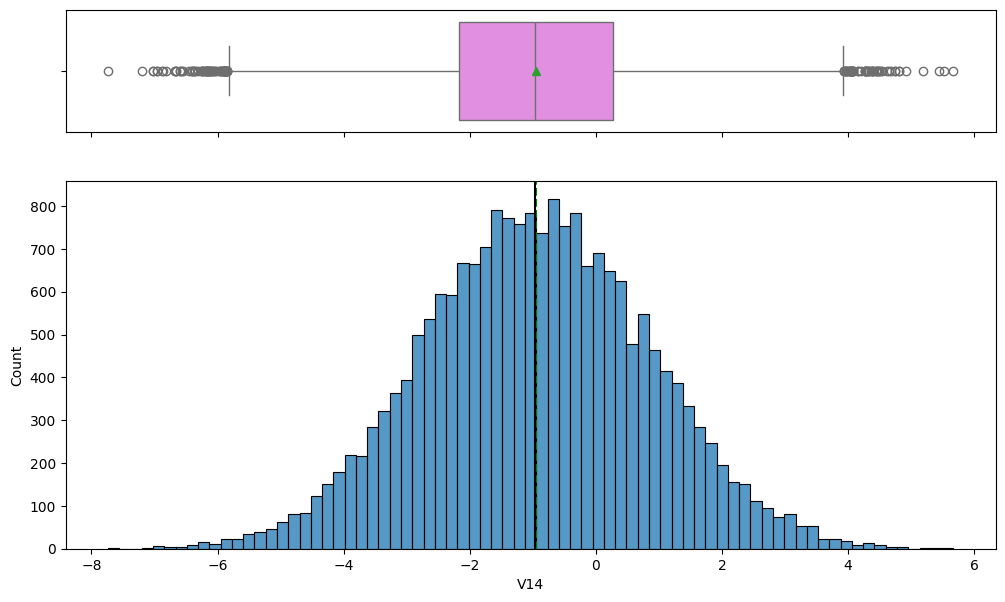

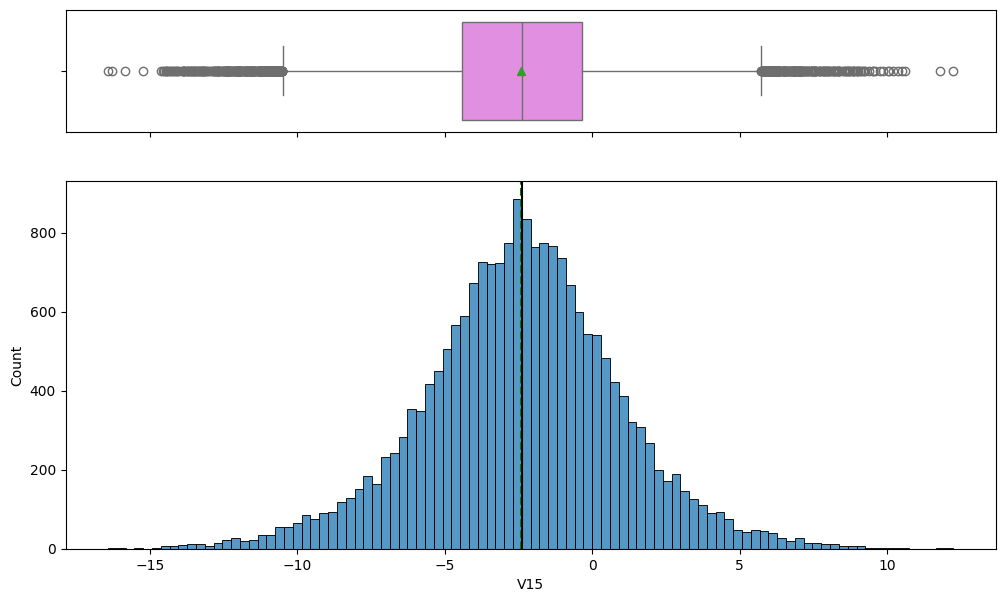

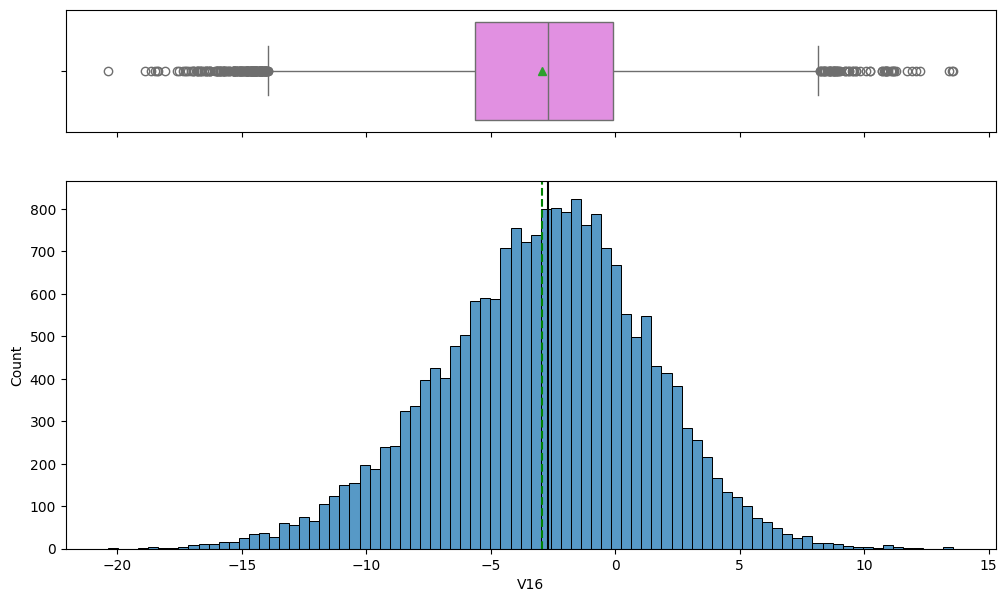

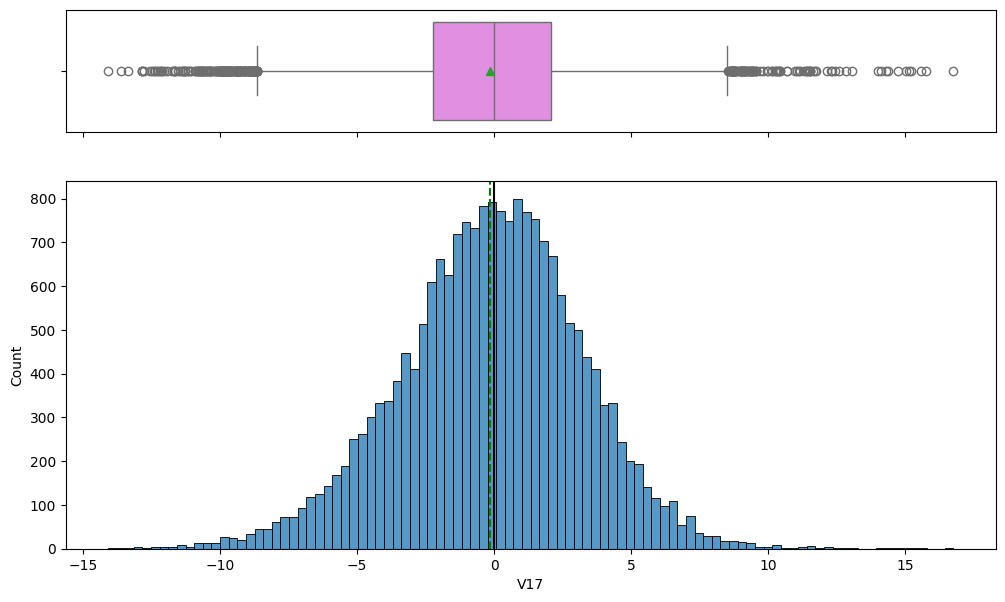

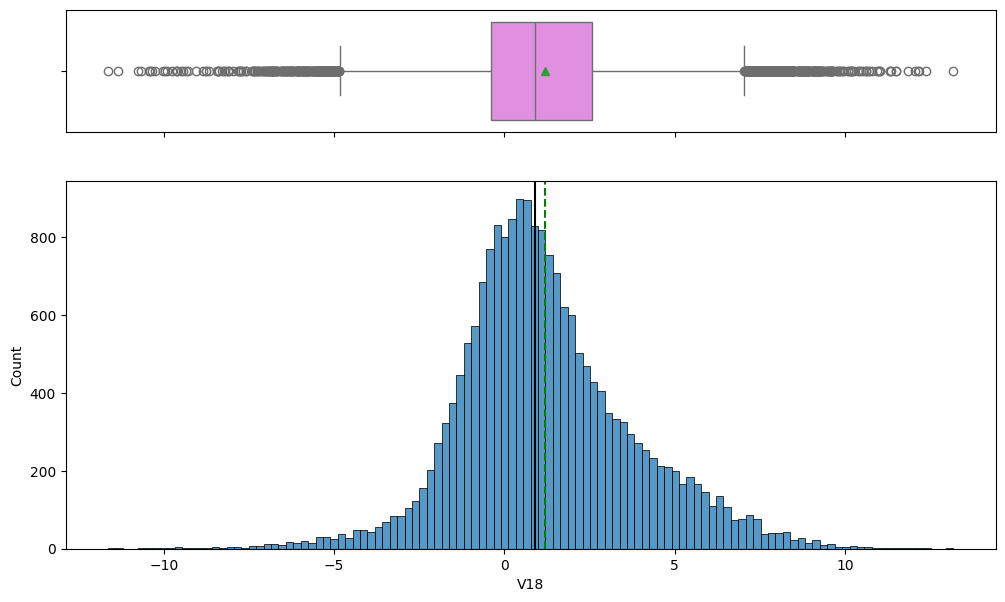

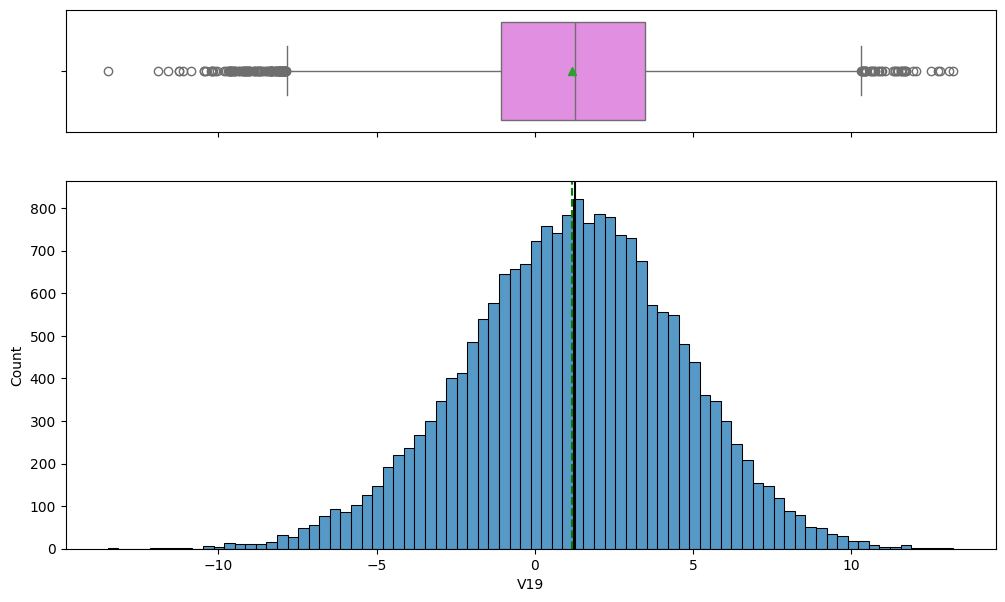

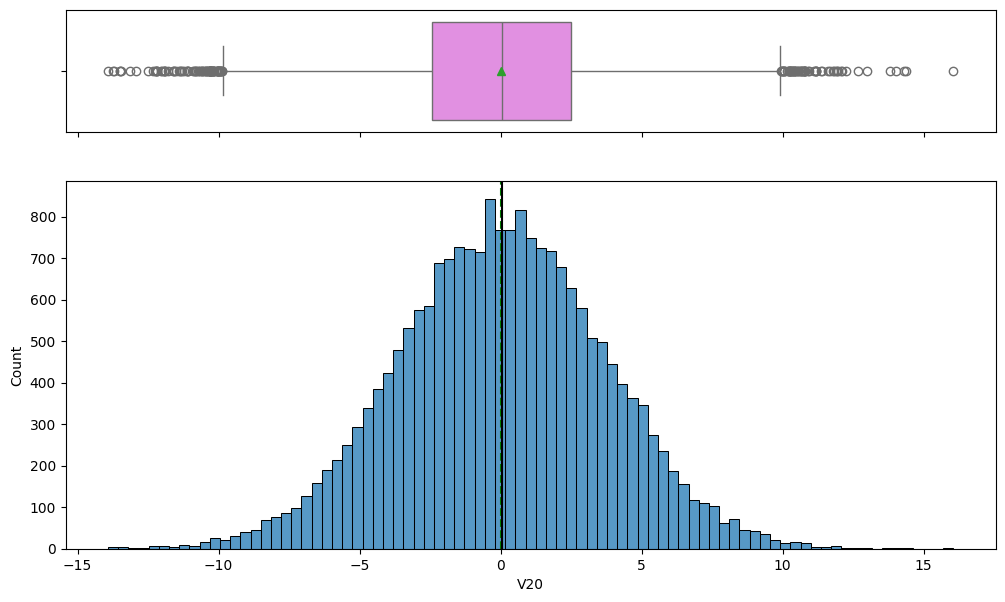

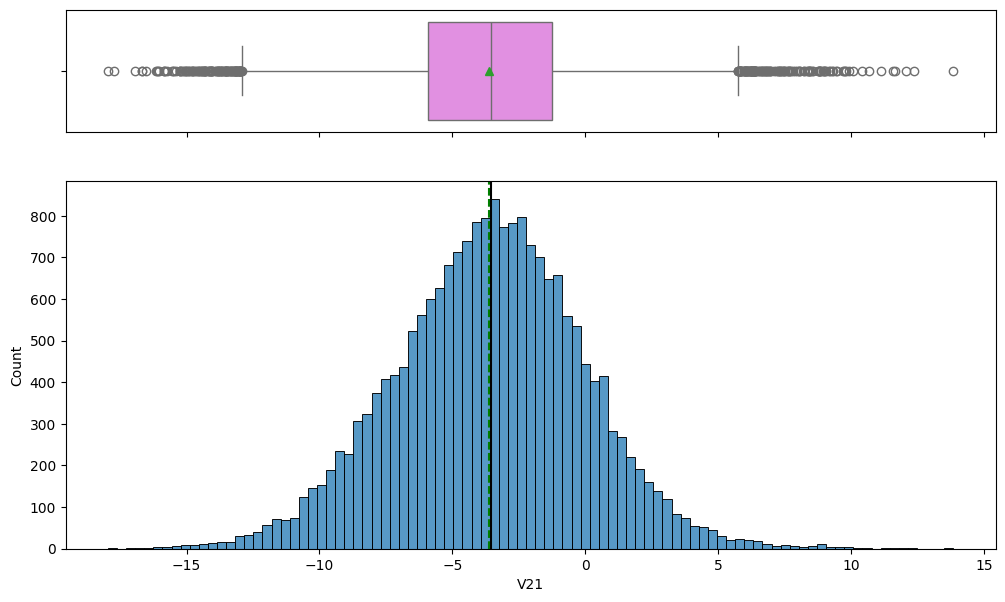

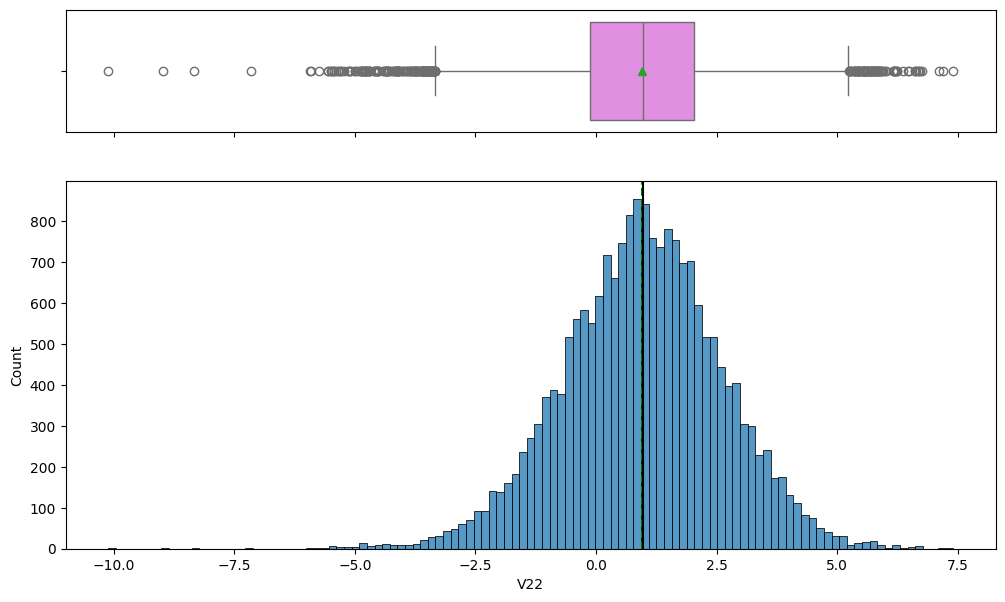

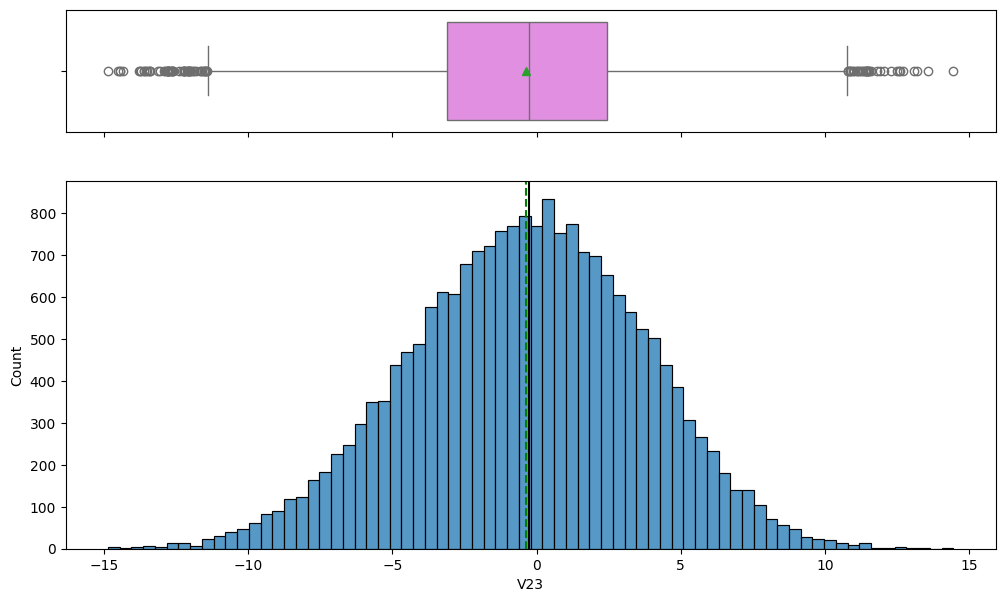

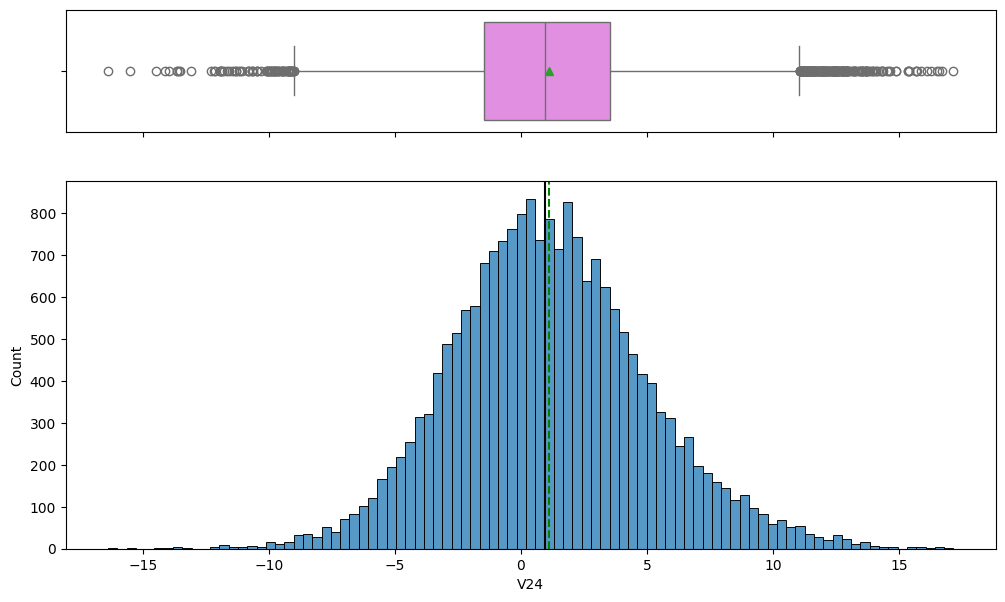

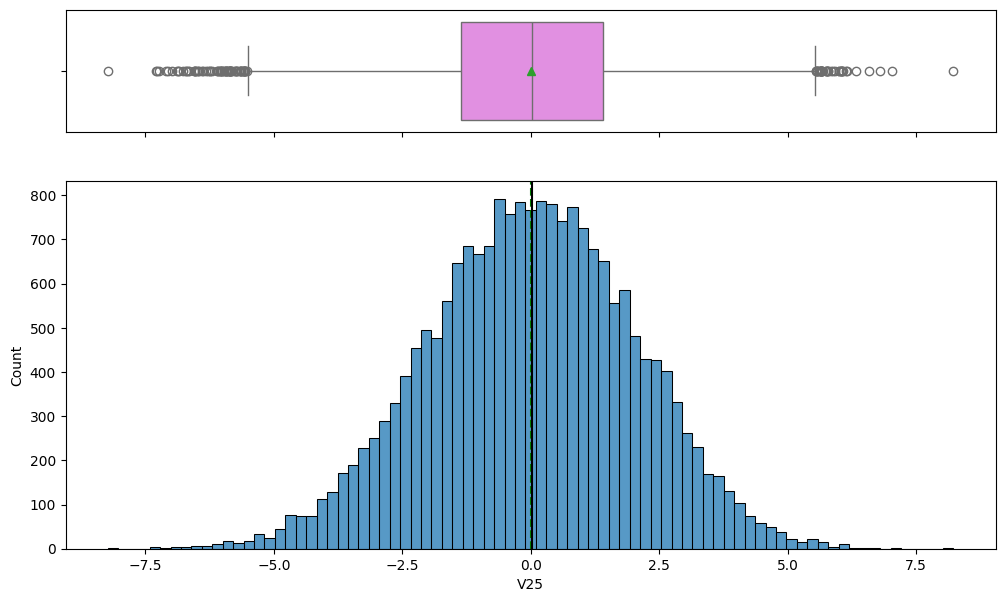

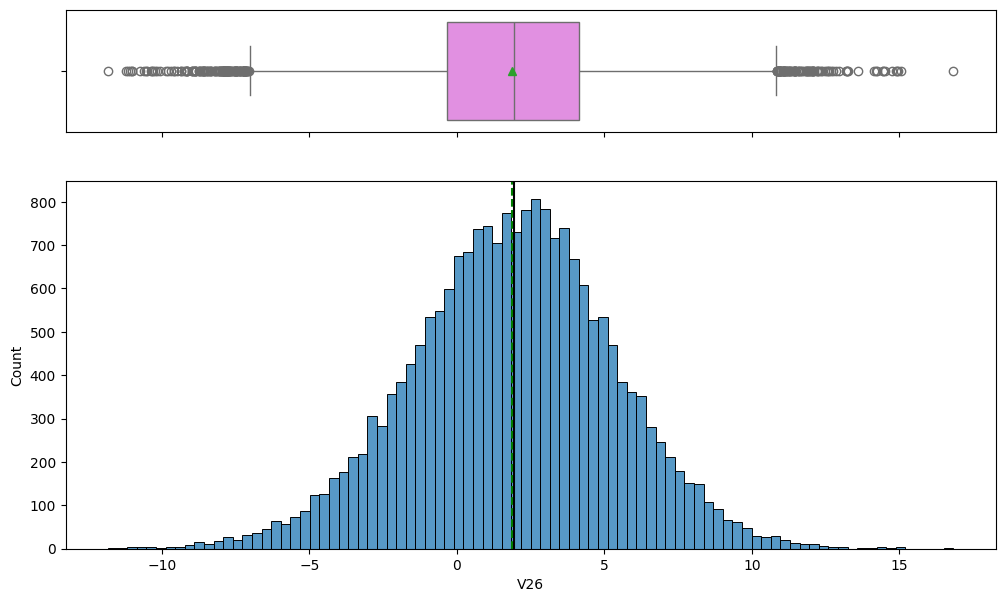

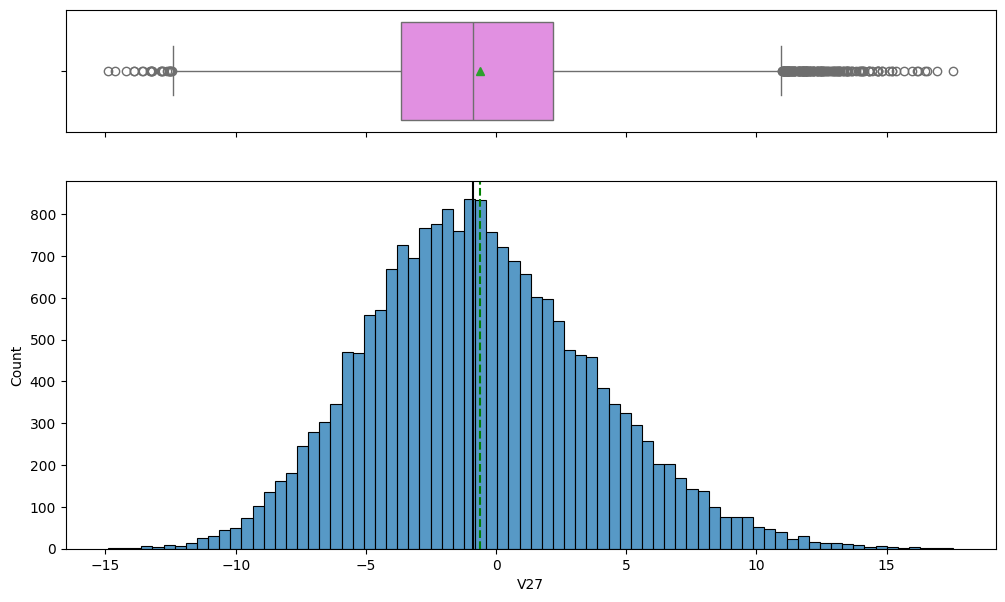

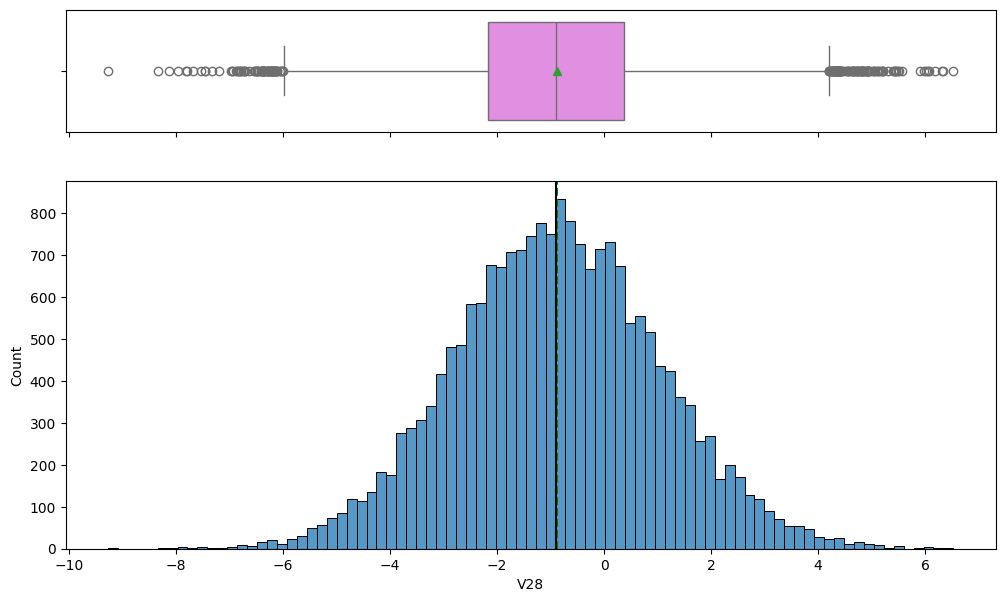

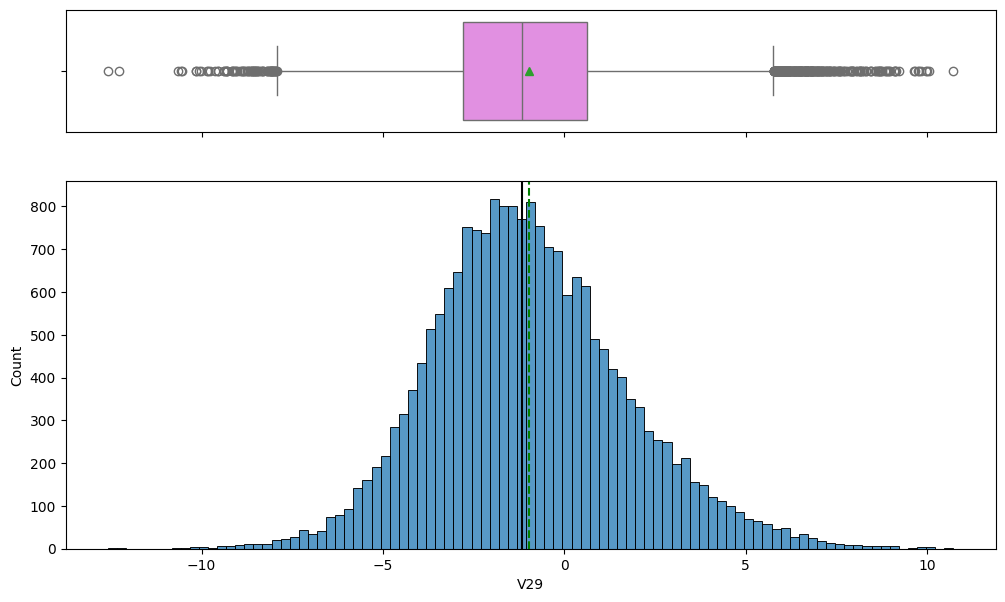

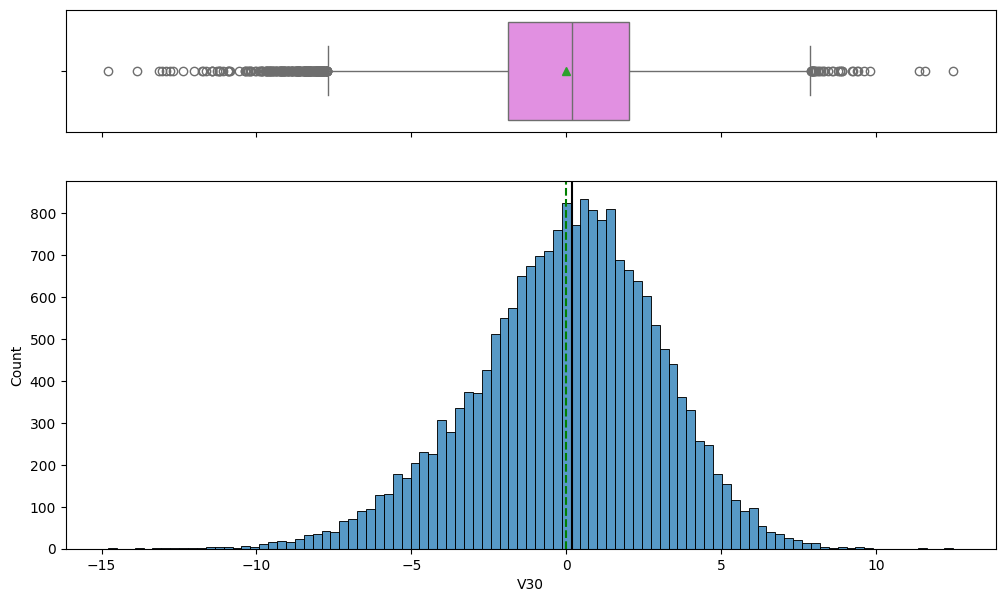

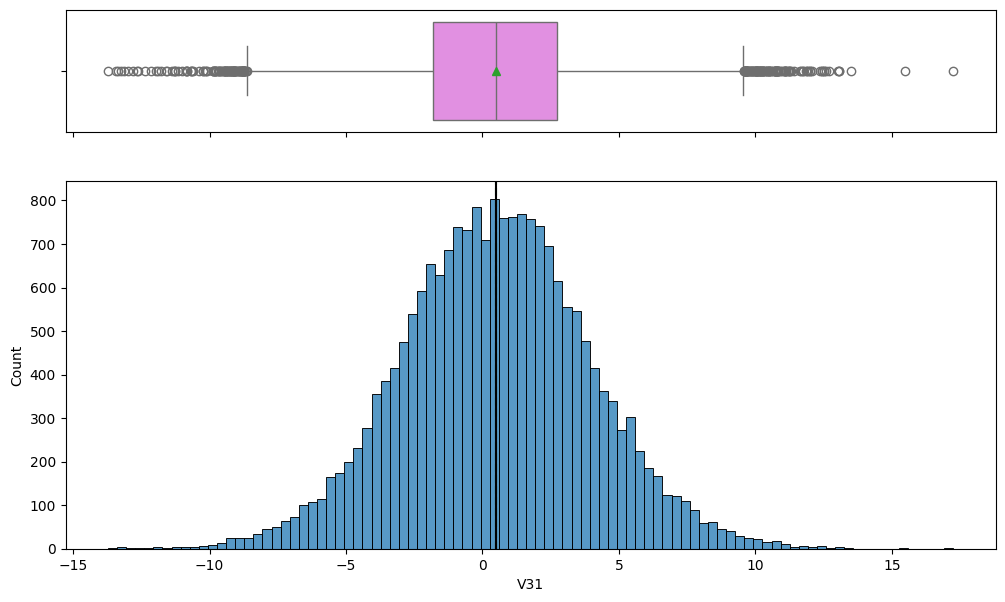

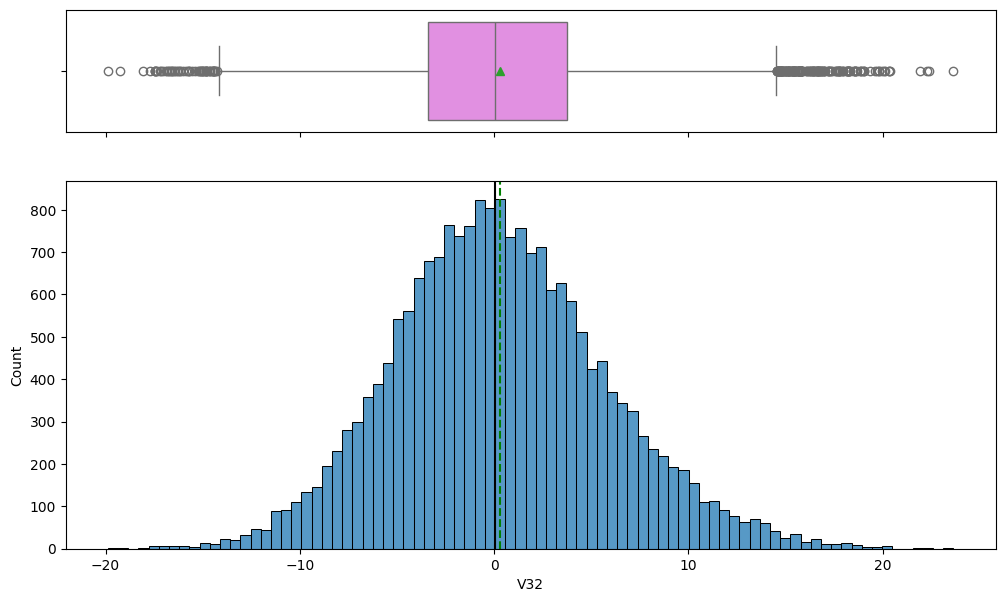

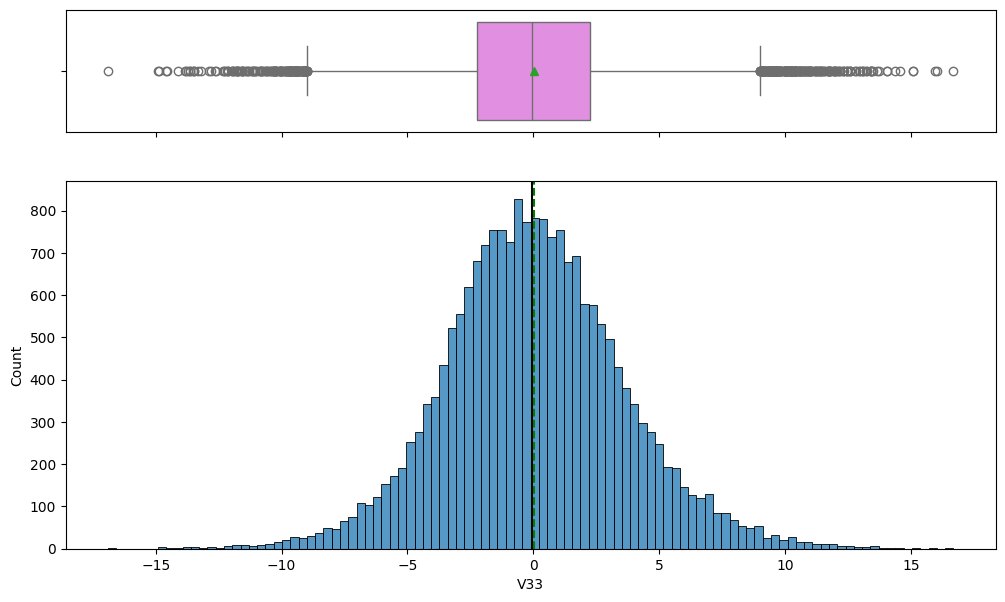

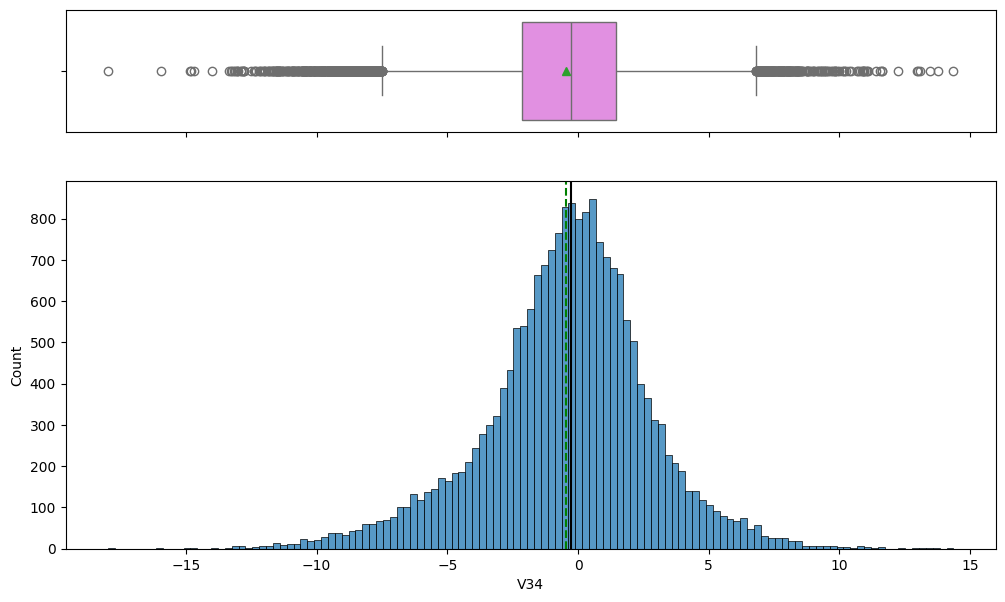

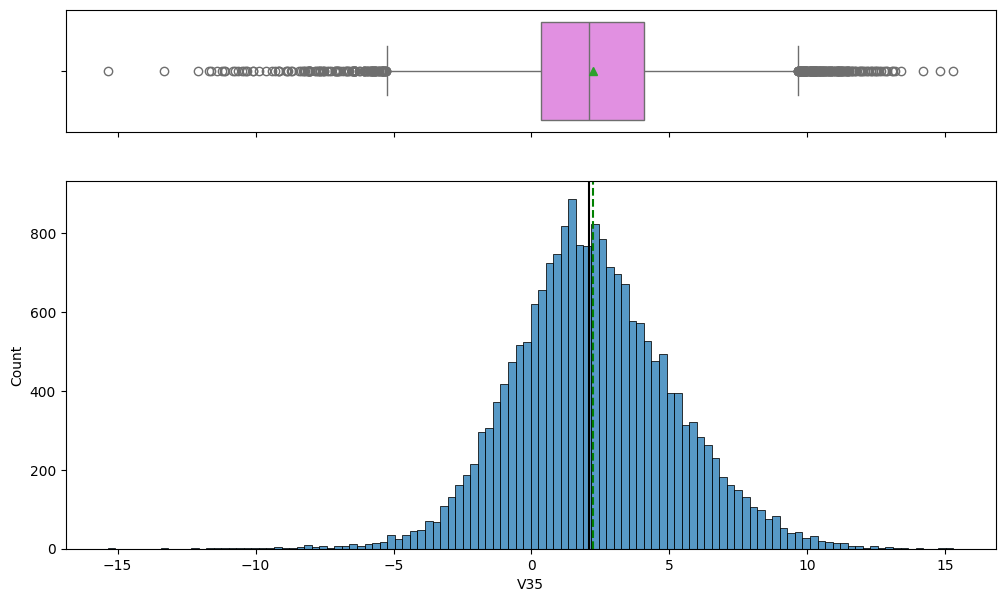

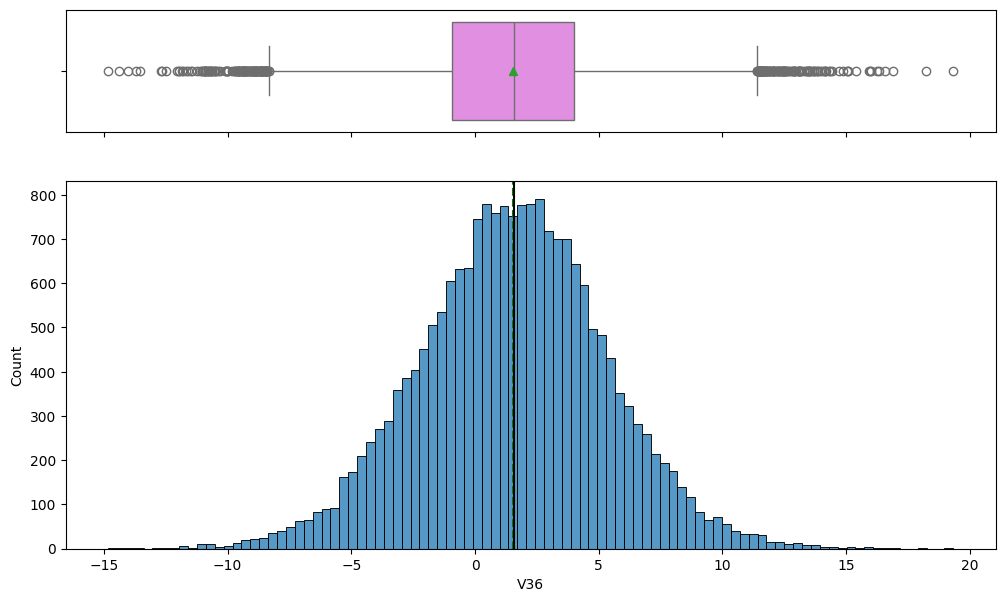

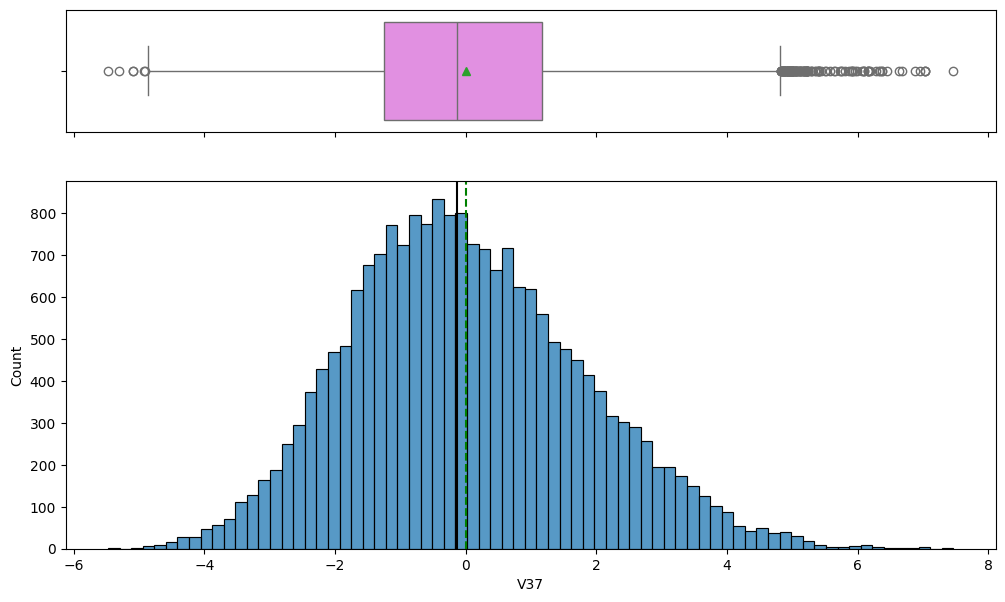

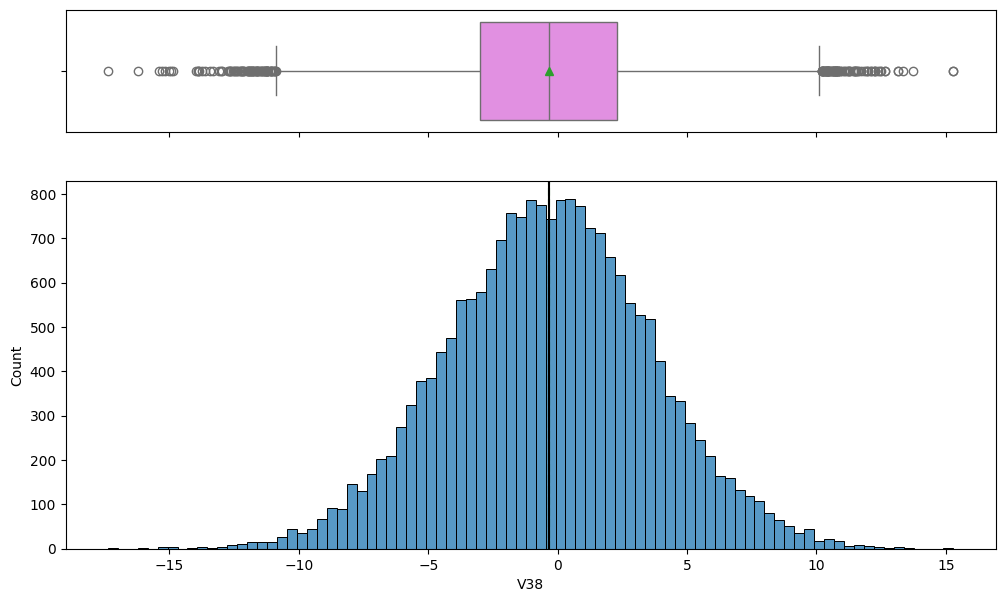

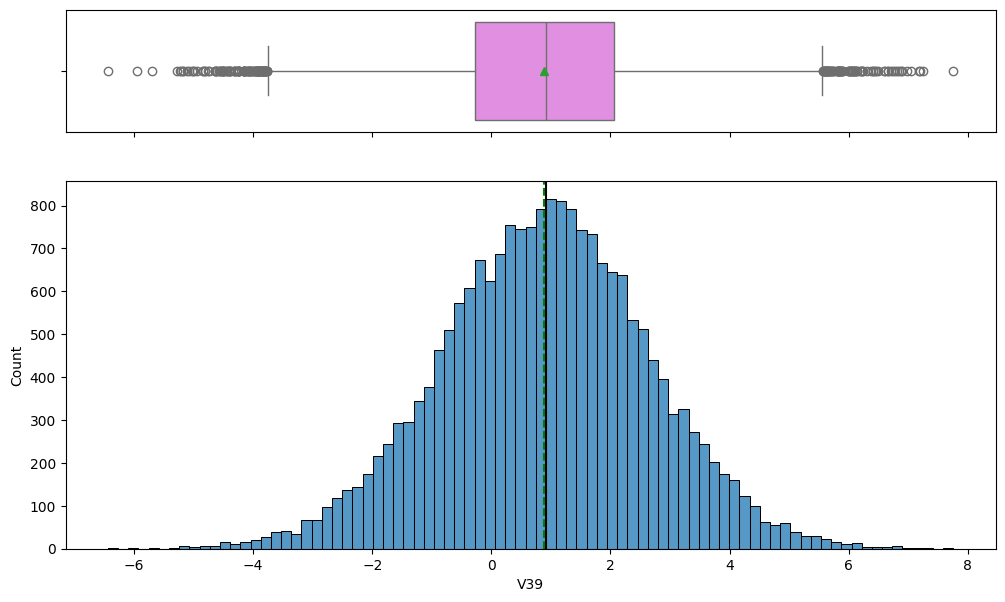

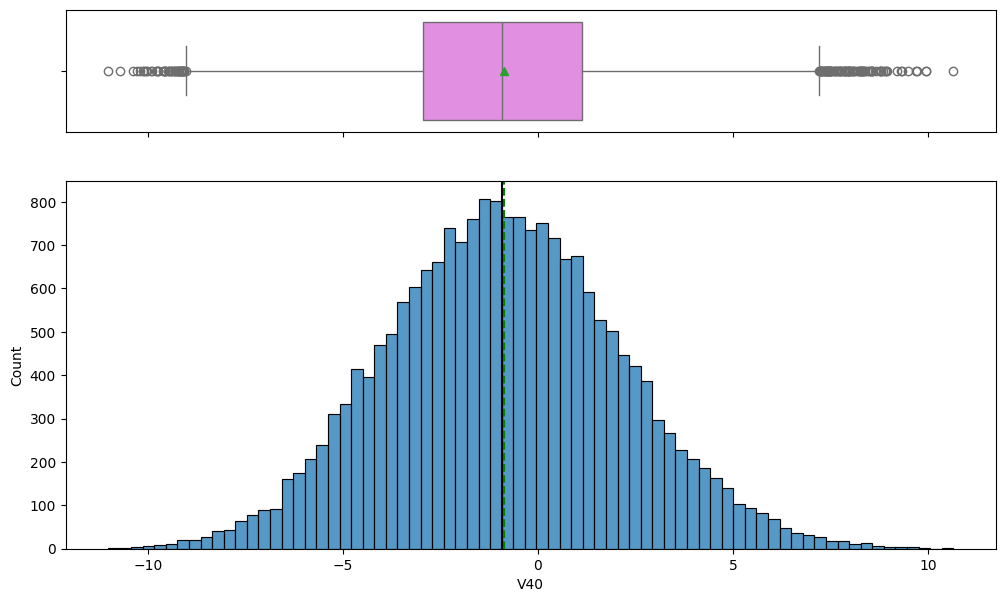

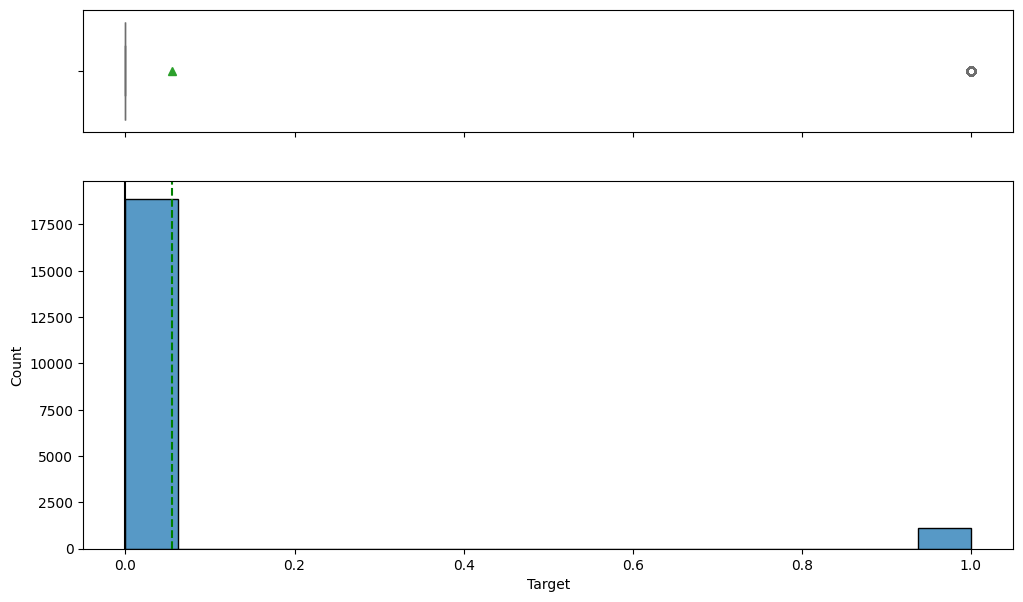

In [14]:
for feature in df.columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

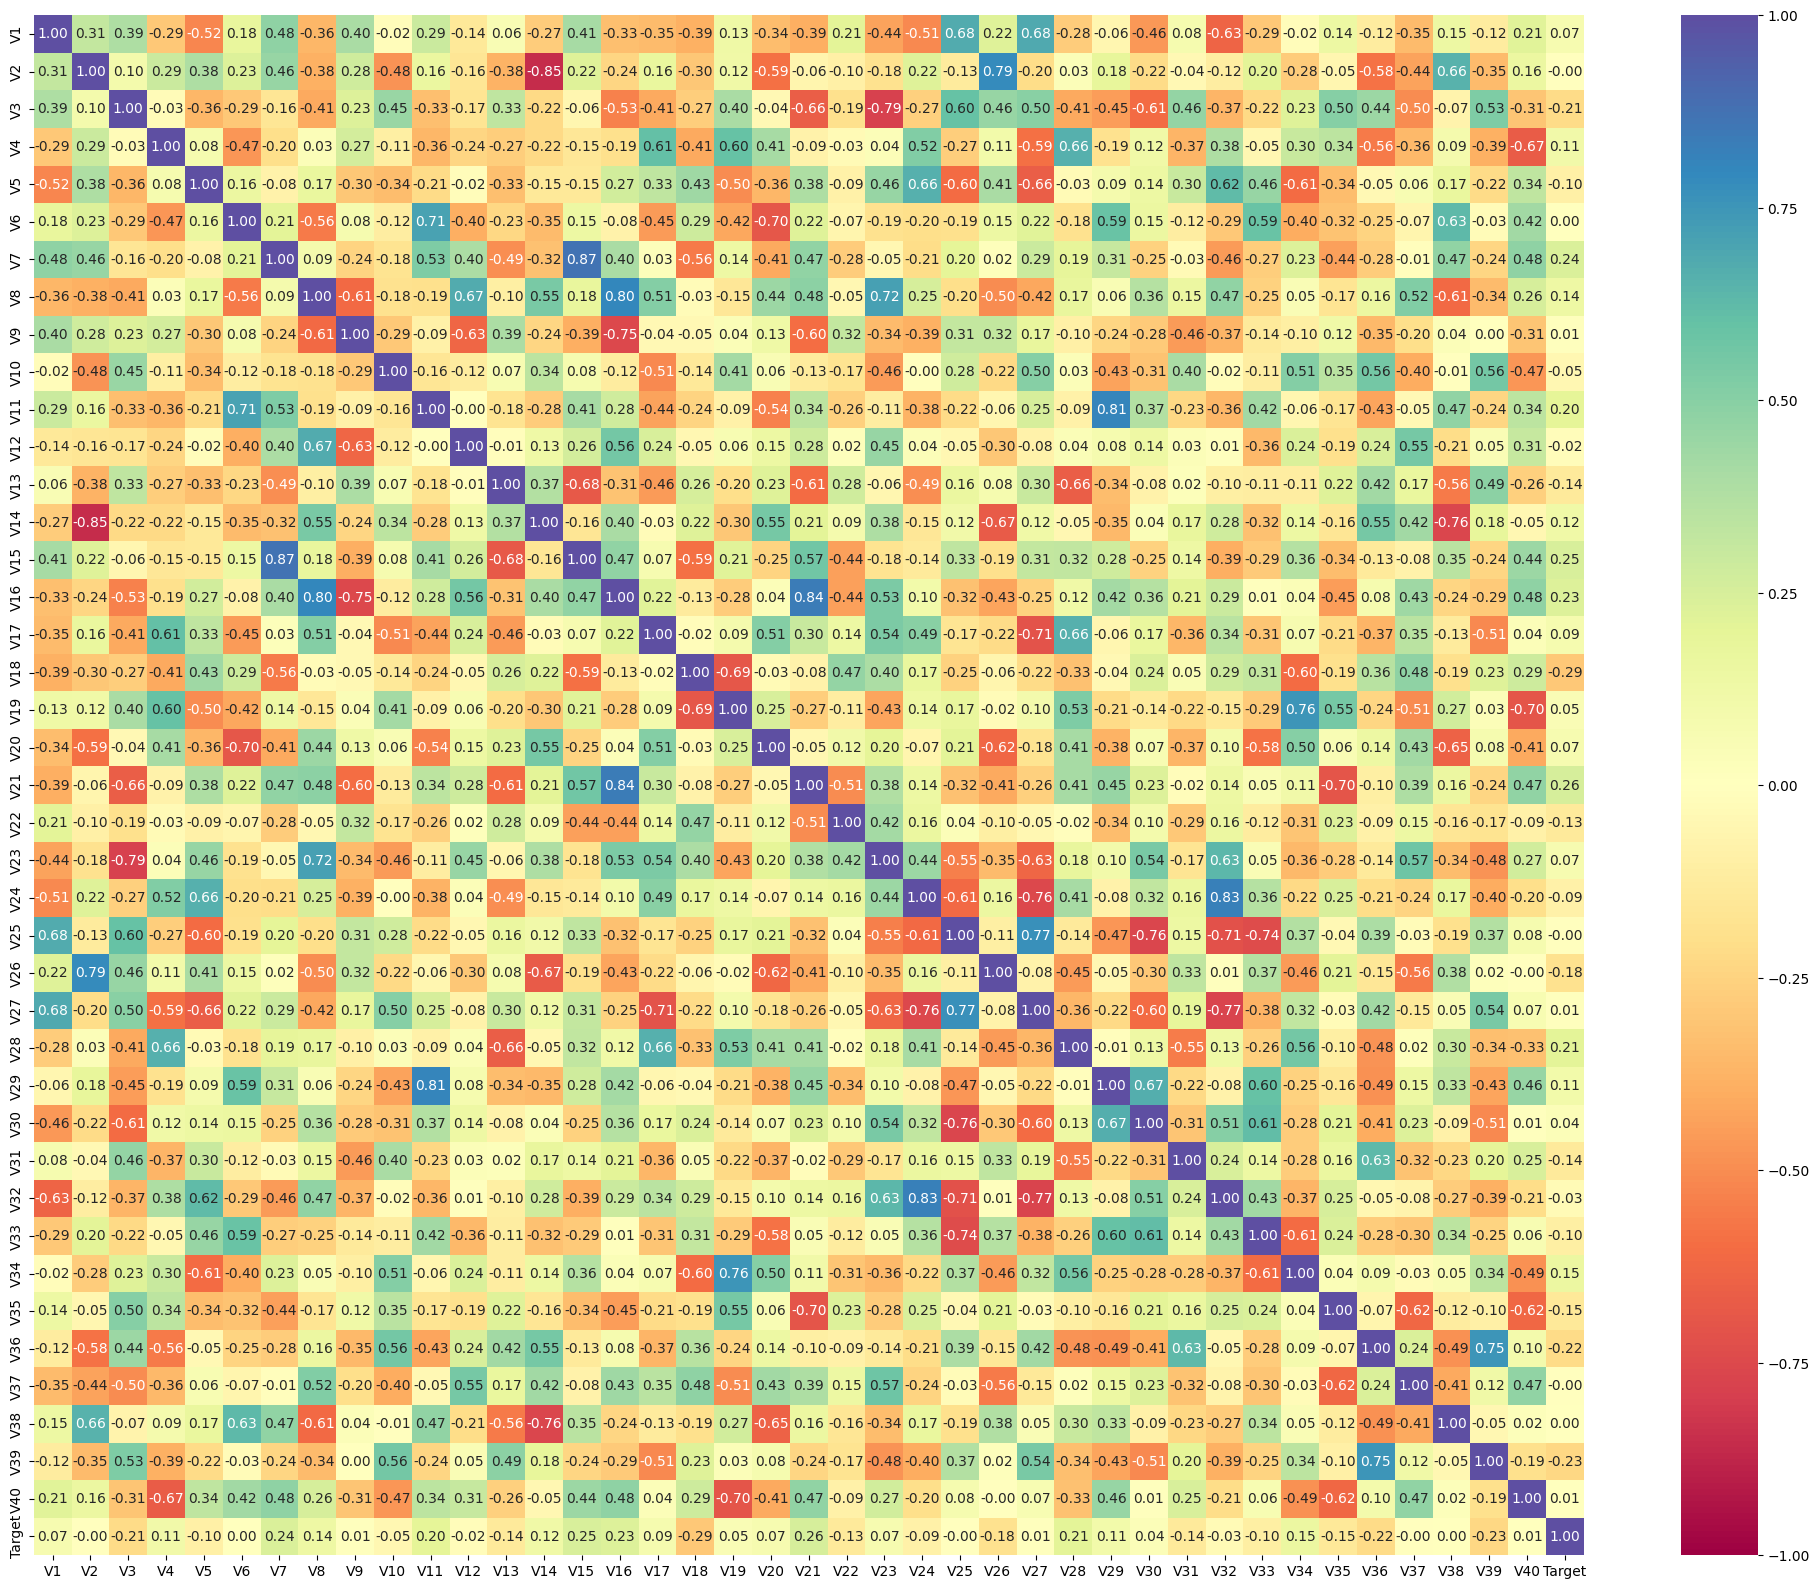

In [15]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

## Data Pre-processing

In [16]:
#checking for duplicates
df.duplicated().sum()

0

## Missing value imputation




In [17]:
df.isnull().sum()[df.isnull().sum()>0]

V1    18
V2    18
dtype: int64

In [18]:
#replacing missing values by mean and median
imputation_dict = {'V1': df.V1.median(), 'V2' : df.V2.mean()}
df.fillna(imputation_dict, inplace= True)

In [19]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

In [20]:
#removing correlated values
correlation = df.corr()

In [21]:
#finding the correlated features
highly_correlated_cols = set()
for i in range(len(correlation.columns)):
    for j in range(i):
        if abs(correlation.iloc[i, j]) > 0.8:
            colname = correlation.columns[i]
            highly_correlated_cols.add(colname)
highly_correlated_cols

{'V14', 'V15', 'V16', 'V21', 'V29', 'V32'}

In [22]:
#Droping the corelated features
df.drop(highly_correlated_cols, axis = 1, inplace= True)

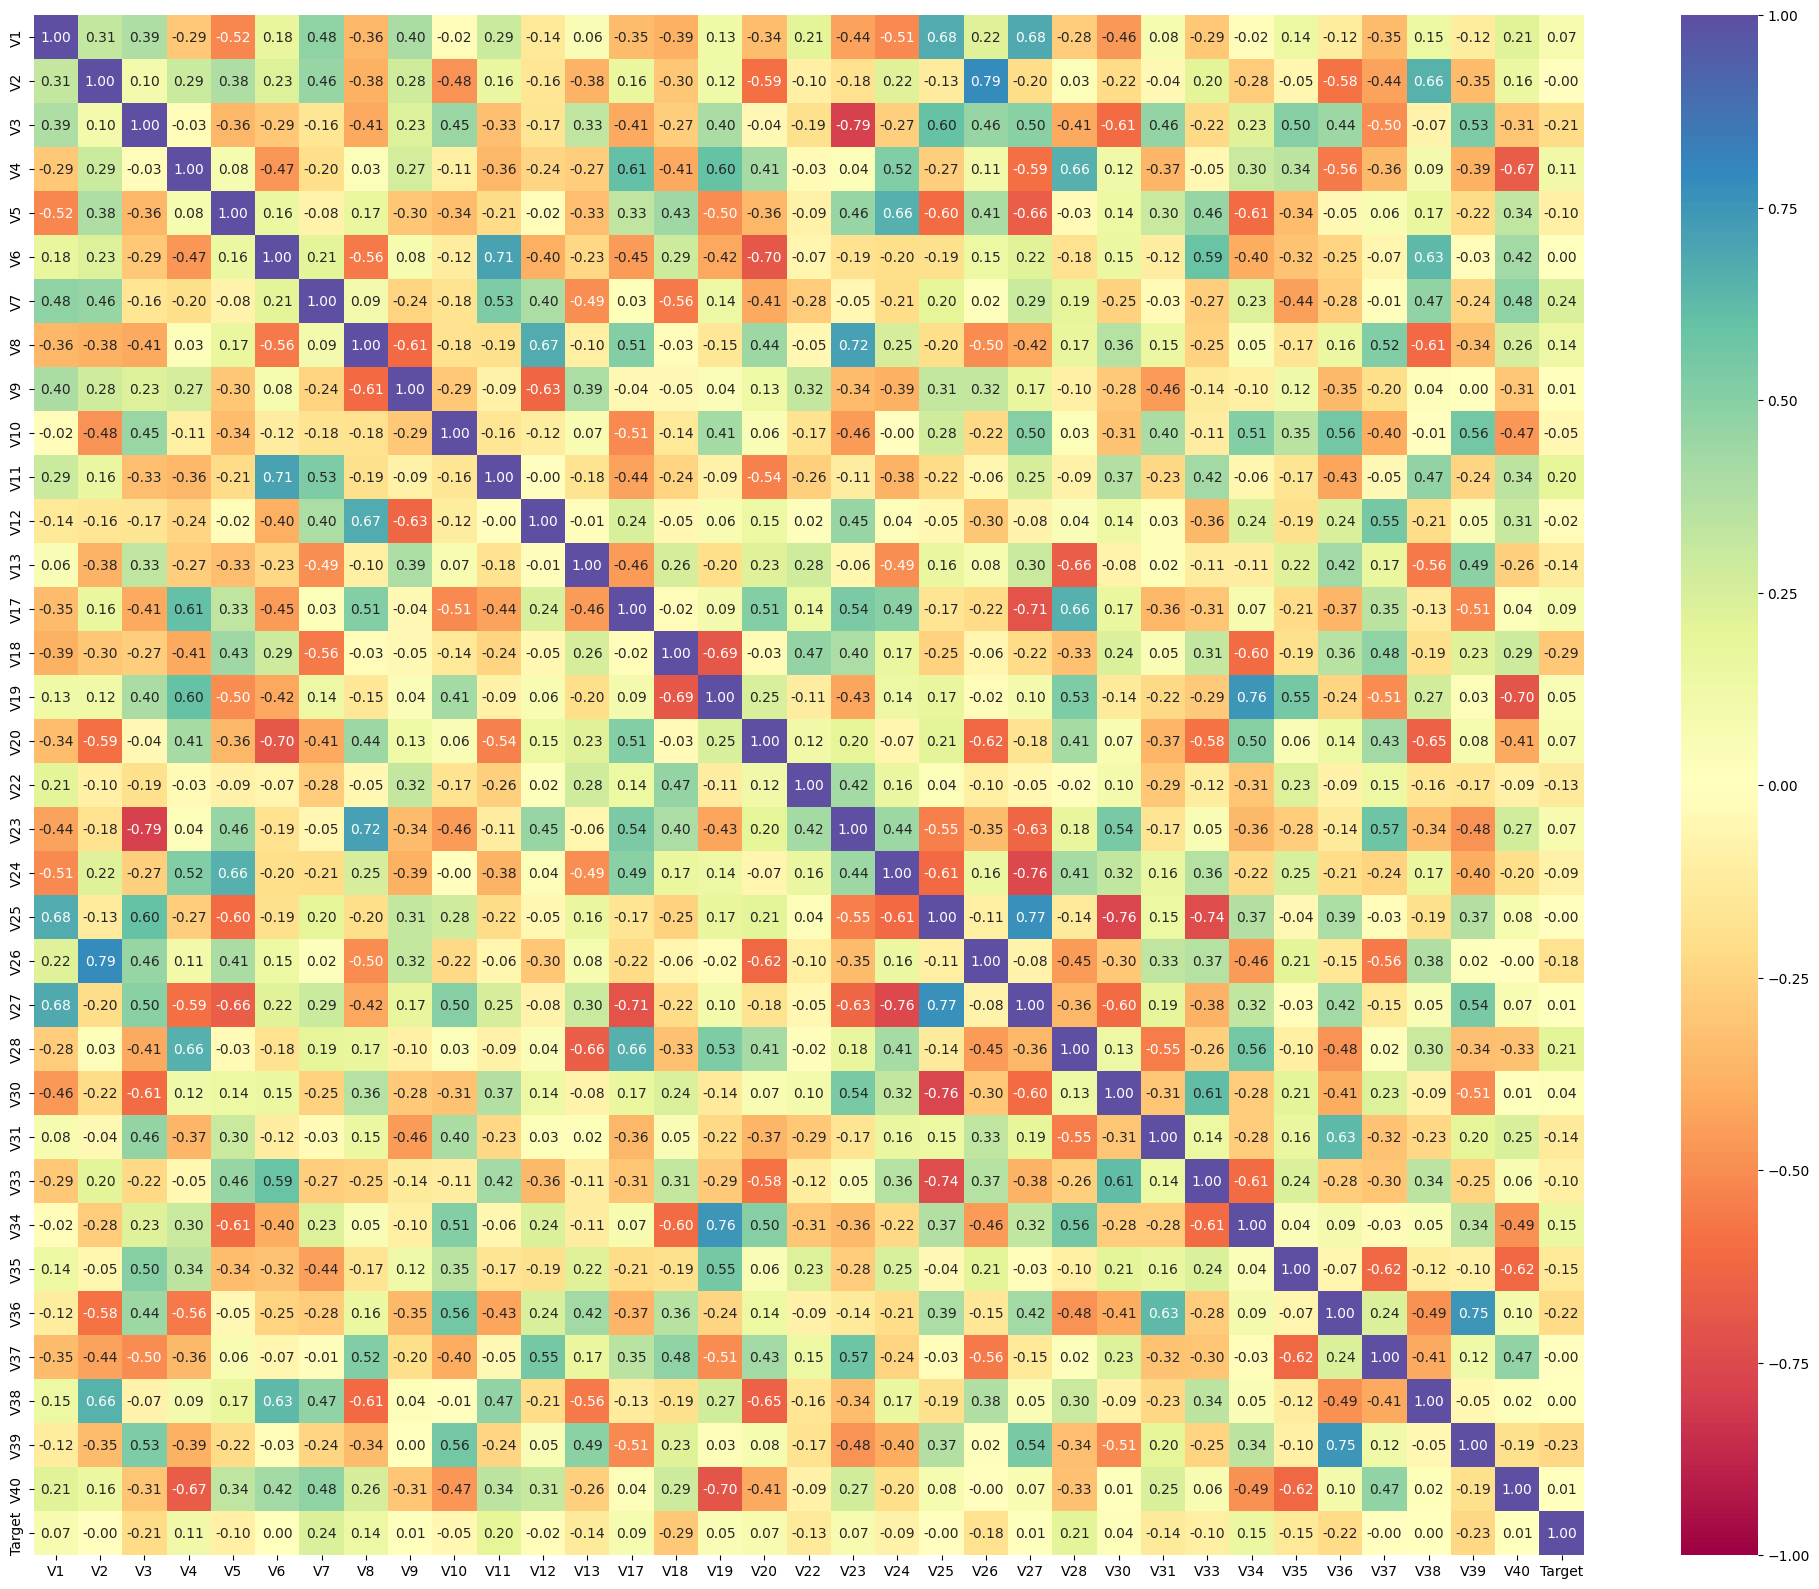

In [23]:
#again checking the correlation
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

In [24]:
#Outlier treatment
#creating a function for outlier treatment. Here using viserisation technique
def outlier_tretment(df,column):
    cap = df[column].quantile(.75) + (1.5 * (df[column].quantile(.75) - df[column].quantile(.25)))
    floor = df[column].quantile(.25)  - (1.5 * (df[column].quantile(.75) - df[column].quantile(.25)))
    df.loc[df[column] >= cap,column] = cap
    df.loc[df[column] <= floor,column] = floor
    print('{} number ourliers are floored to {} and {} number ourliers are capped to {} for {}'.format(sum(df[column] >= cap),cap,sum(df[column] <= floor),floor,column))
    return df

In [25]:
df.columns.drop('Target')

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V17', 'V18', 'V19', 'V20', 'V22', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'V30', 'V31', 'V33', 'V34', 'V35', 'V36', 'V37',
       'V38', 'V39', 'V40'],
      dtype='object')

In [26]:
#Doing the Outlier treatment for all columns
for i in df.columns.drop('Target'):
    df = outlier_tretment(df,i)
df

204 number ourliers are floored to 8.697038993 and 10 number ourliers are capped to -9.595468691 for V1
85 number ourliers are floored to 8.812472241125 and 98 number ourliers are capped to -7.907372703875001 for V2
215 number ourliers are floored to 11.105121678 and 60 number ourliers are capped to -6.332096354 for V3
139 number ourliers are floored to 8.848026312624999 and 89 number ourliers are capped to -9.065071370375 for V4
81 number ourliers are floored to 5.654610273874999 and 32 number ourliers are capped to -5.849736979125 for V5
65 number ourliers are floored to 4.471681297875 and 90 number ourliers are capped to -6.4385896071249995 for V6
203 number ourliers are floored to 3.6056262381250006 and 88 number ourliers are capped to -5.412857980875001 for V7
32 number ourliers are floored to 8.271409967 and 159 number ourliers are capped to -9.191109786999998 for V8
93 number ourliers are floored to 5.76546797325 and 55 number ourliers are capped to -5.85123781075 for V9
53 numb

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V31,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,1.667098,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,0.024883,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-1.600395,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,4.948770,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-5.743597,...,2.044184,6.629213,-7.497861,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-3.938493,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-1.088553,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,0.981858,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-7.907373,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,1.914766,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0


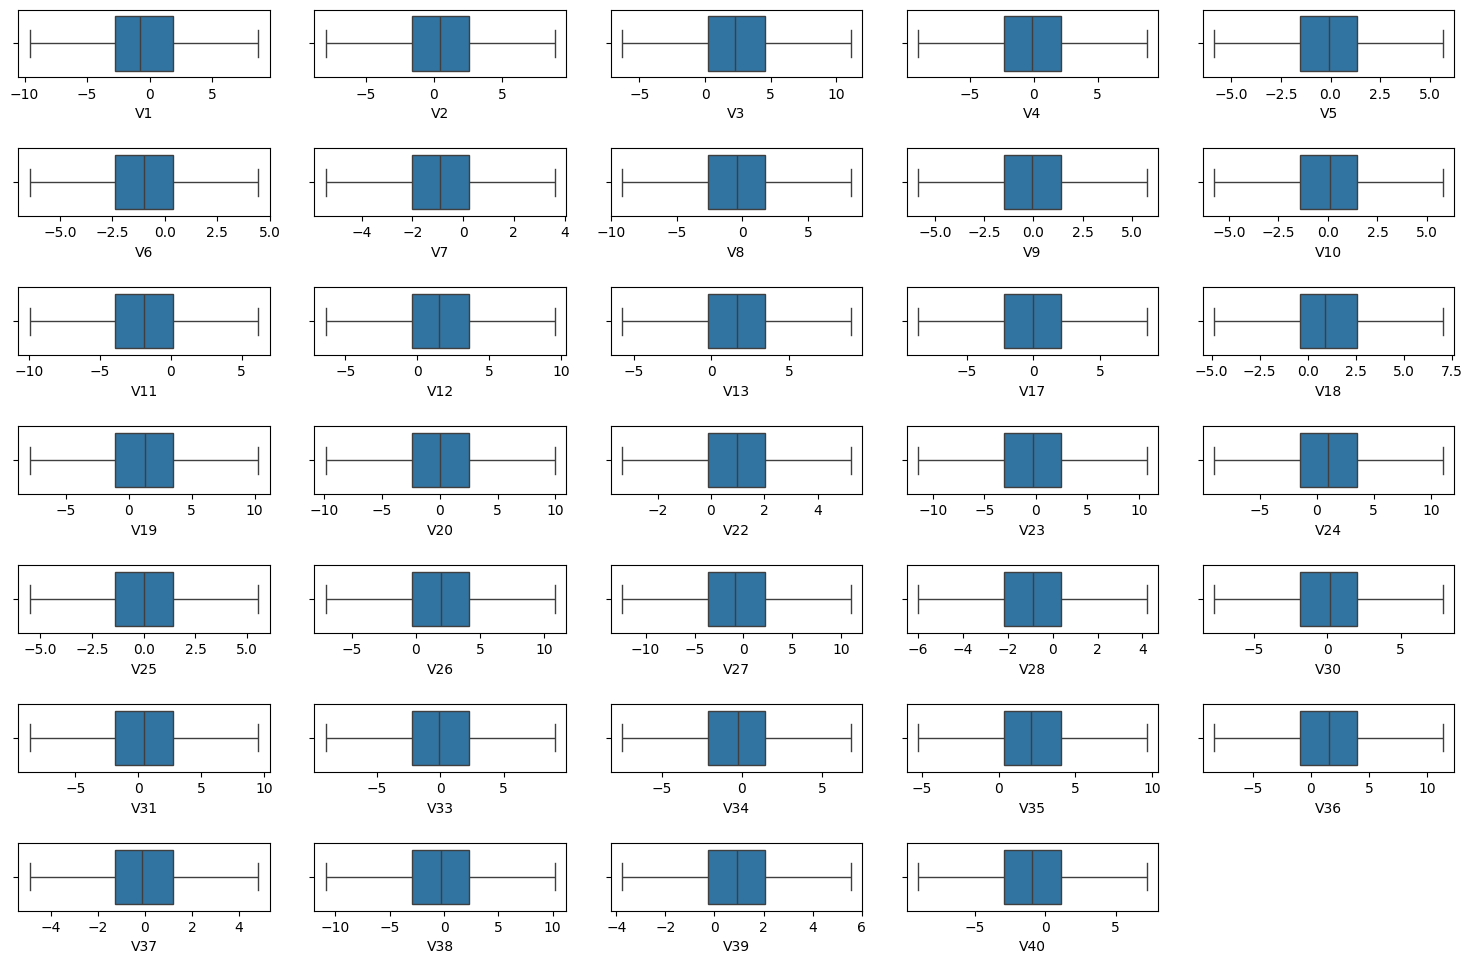

In [27]:
# outlier detection using boxplot
plt.figure(figsize=(15, 10))
for i, variable in enumerate(df.columns.drop('Target')):
    plt.subplot(7, 5, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

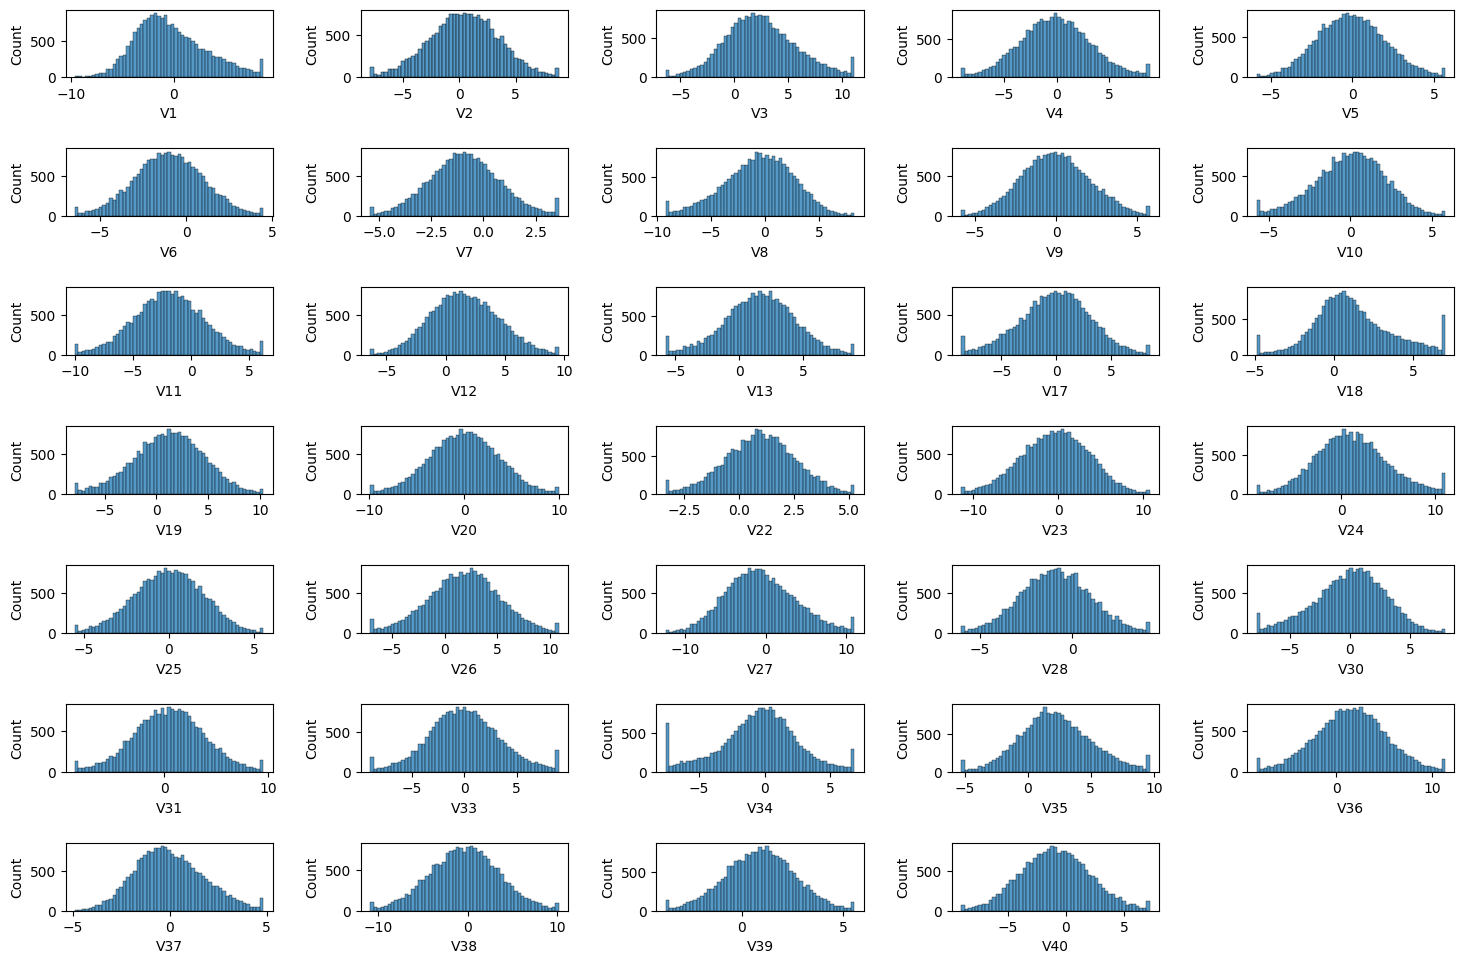

In [28]:
plt.figure(figsize=(15, 10))
for i, variable in enumerate(df.columns.drop('Target')):
    plt.subplot(7, 5, i + 1)
    sns.histplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [29]:
#Splitting data in to train validation and test
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target',axis = 1), df['Target'], train_size= .85, random_state= 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size= .8, random_state= 10)

In [30]:
X_train.shape

(13600, 34)

In [31]:
X_val.shape

(3400, 34)

In [32]:
X_test.shape

(3000, 34)

## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [33]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [34]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [35]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("dtree", DecisionTreeClassifier(random_state=1)))
models.append(("logreg", LogisticRegression(random_state=1)))
models.append(("Randomforest", RandomForestClassifier(random_state=1)))
models.append(("Bagging_class", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))))
models.append(("Adaboost_class", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1))))
models.append(("SVM", SVC(kernel='linear', random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.7210526315789474
logreg: 0.5618421052631579
Randomforest: 0.7065789473684211
Bagging_class: 0.7039473684210525
Adaboost_class: 0.7184210526315788
SVM: 0.5447368421052631

Validation Performance:

dtree: 0.6720430107526881
logreg: 0.4838709677419355
Randomforest: 0.6344086021505376
Bagging_class: 0.6344086021505376
Adaboost_class: 0.6666666666666666
SVM: 0.44086021505376344


#### Observations:
* The best 3 model seems to be Decision tree, Random forest and Adaboost in means of Recall value.
* Dtree has a recall value of 0.721
* Random forest has recall value of 0.706
* Adaboost has a recall value of 0.718

### Model Building with Oversampled data


In [36]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

####Observations:
* the best 3 model seems to be logistic regression, Randim forest and Adaboost in means of Recall value
* Logistiac regression has a recall value of 0.8387
* Random forest has a recalll value of 0.8655
* bagging class has a recall value of 0.833

### Model Building with Undersampled data

In [38]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [39]:
results3 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold
    )
    results3.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

dtree: 0.8394736842105264
logreg: 0.8657894736842107
Randomforest: 0.8921052631578947
Bagging_class: 0.8592105263157894
Adaboost_class: 0.8368421052631578
SVM: 0.8618421052631579

Validation Performance:

dtree: 0.8225806451612904
logreg: 0.8548387096774194
Randomforest: 0.8602150537634409
Bagging_class: 0.8064516129032258
Adaboost_class: 0.8172043010752689
SVM: 0.8440860215053764


## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### Sample tuning method for Decision tree with original data

In [43]:
#Choosing the parameter grid for the selected models
param_grid_1 = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

param_grid_2 = {'C': np.arange(0.1,1.1,0.1)}

param_grid_3 = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

param_grid_4 = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

param_grid_5 = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

param_grid_6 = {
    'C': [0.1, 1, 10],          # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4],        # Degree of the polynomial kernel (only for 'poly' kernel)
    'gamma': ['scale', 'auto'], # Kernel coefficient (only for 'rbf' and 'poly' kernels)
}


param_grid = [param_grid_1,param_grid_2,param_grid_3,param_grid_4,param_grid_5,param_grid_6]

In [44]:
#Fine tuming the best three model selected using original dataset
models_rscv_1 = []  # Empty list to store all the models

# Appending models into the list
models_rscv_1.append((param_grid_1,"dtree", DecisionTreeClassifier(random_state=1)))
models_rscv_1.append((param_grid_3,"Randomforest", RandomForestClassifier(random_state=1)))
models_rscv_1.append((param_grid_5,"Adaboost_class", AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1))))

In [ ]:
best_model_normal = []
for param, name, model in models_rscv_1:
#Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train,y_train)

    best_params_1 = randomized_cv.best_params_
    best_model_1 = randomized_cv.best_estimator_
    best_model_normal.append((name,best_model_1))

    model_check = best_model_1.fit(X_train,y_train)
    scores = recall_score(y_val, model_check.predict(X_val))

    print(" The {} model's Best parameters are {} with CV score={}:" .format(name, randomized_cv.best_params_,randomized_cv.best_score_))
    print("Validation score of {}: {}".format(name, scores))

### Sample tuning method for Decision tree with oversampled data

In [46]:
models_rscv_2 = []  # Empty list to store all the models

# Appending models into the list
models_rscv_2.append((param_grid_3,"Randomforest", RandomForestClassifier(random_state=1)))
models_rscv_2.append((param_grid_2,"logreg", LogisticRegression(random_state=1)))
models_rscv_2.append((param_grid_6,"SVM", SVC(random_state=1)))

In [ ]:
best_model_over = []
for param, name, model in models_rscv_2:
#Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train,y_train)

    best_params_1 = randomized_cv.best_params_
    best_model_1 = randomized_cv.best_estimator_
    best_model_over.append((name,best_model_1))

    model_check = best_model_1.fit(X_train,y_train)
    scores = recall_score(y_val, model_check.predict(X_val))

    print(" The {} model's Best parameters are {} with CV score={}:" .format(name, randomized_cv.best_params_,randomized_cv.best_score_))
    print("Validation score of {}: {}".format(name, scores))

### Sample tuning method for Decision tree with undersampled data

In [50]:
models_rscv_3 = []  # Empty list to store all the models

# Appending models into the list
models_rscv_3.append((param_grid_2,"logreg", LogisticRegression(random_state=1)))
models_rscv_3.append((param_grid_3,"Randomforest", RandomForestClassifier(random_state=1)))
models_rscv_3.append((param_grid_4,"Bagging_class", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1))))


In [51]:
best_model_under = []
for param, name, model in models_rscv_3:
#Calling RandomizedSearchCV
    randomized_cv = RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

    #Fitting parameters in RandomizedSearchCV
    randomized_cv.fit(X_train_un,y_train_un)

    best_params_1 = randomized_cv.best_params_
    best_model_1 = randomized_cv.best_estimator_
    best_model_under.append((name,best_model_1))

    model_check = best_model_1.fit(X_train_un,y_train_un)
    scores = recall_score(y_val, model_check.predict(X_val))

    print(" The {} model's Best parameters are {} with CV score={}:" .format(name, randomized_cv.best_params_,randomized_cv.best_score_))
    print("Validation score of {}: {}".format(name, scores))

 The logreg model's Best parameters are {'C': 0.1} with CV score=0.8710526315789473:
Validation score of logreg: 0.8387096774193549
 The Randomforest model's Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.8986842105263158:
Validation score of Randomforest: 0.8602150537634409
 The Bagging_class model's Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.8} with CV score=0.8894736842105264:
Validation score of Bagging_class: 0.8548387096774194


## Model performance comparison and choosing the final model

In [54]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(models, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables


    accuracy_list = []
    recall_list = []
    precision_list = []
    f1_score_list = []
    index_list = []

    for i in range (len(models)):
        pred = models[i].predict(predictors)
        acc = accuracy_score(target, pred)  # to compute Accuracy
        accuracy_list.append(acc)

        recall = recall_score(target, pred)  # to compute Recall
        recall_list.append(recall)

        precision = precision_score(target, pred)  # to compute Precision
        precision_list.append(precision)

        f1 = f1_score(target, pred)  # to compute F1-score
        f1_score_list.append(f1)

        model_name = 'Model_' + str(i)
        index_list.append(model_name)


    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": accuracy_list,
            "Recall": recall_list,
            "Precision": precision_list,
            "F1": f1_score_list

        },
        index= index_list,
    )

    return df_perf

In [ ]:
all_9_models = best_model_normal + best_model_over + best_model_under

In [ ]:
all_9_models[0][1]

In [ ]:
all_9_models_only = [i[1] for i in all_9_models]

In [ ]:
all_9_models_only

### Test set final performance

## Pipelines to build the final model


# Business Insights and Conclusions

***